In [37]:
import os
import bokeh
from bokeh.plotting import show
import pandas as pd
import numpy as np

import flowkit as fk
import graphviz
import seaborn as sns
import matplotlib.pyplot as plt

bokeh.io.output_notebook()

Loading BokehJS ...

# Dataset Loading

## Z3JB

In [3]:
base_Z3JB = "Z3JB"
wsp_Z3JB = os.path.join(base_Z3JB, "OMIP_data.wsp")
sample_Z3JB =  os.path.join(base_Z3JB, "FCS_files")

print(wsp_Z3JB)
print(sample_Z3JB)

Z3JB\OMIP_data.wsp
Z3JB\FCS_files


In [5]:
Z3JB = fk.Workspace(wsp_Z3JB, fcs_samples=sample_Z3JB)

In [6]:
Z3JB.summary()

samples  loaded_samples  gates  max_gate_depth
group_name                                                 
All Samples       11              11      8               4

In [9]:
Z3JBsamples = Z3JB.get_sample_ids()
display(Z3JBsamples)

['test_export_BC93-2_full_DownsampleDP_DownsampleDP.fcs',
 'train_export_BC93-2_FMO1-TIGIT-CD95-NKG2C_DownsampleDP_train.fcs',
 'train_export_BC93-2_FMO10-CD194-CD39-CD27_DownsampleDP_train.fcs',
 'train_export_BC93-2_FMO2-CD69-FoxP3-CD8_DownsampleDP_train.fcs',
 'train_export_BC93-2_FMO3-DNAM-PD1-CD62L_DownsampleDP_train.fcs',
 'train_export_BC93-2_FMO4-CD25-NKG2A-CD183_DownsampleDP_train.fcs',
 'train_export_BC93-2_FMO5-CD56-Tim3-gdTCR_DownsampleDP_train.fcs',
 'train_export_BC93-2_FMO6-CCR10-CD45RA-CD57_DownsampleDP_train.fcs',
 'train_export_BC93-2_FMO7-NKG2D-CD3_DownsampleDP_train.fcs',
 'train_export_BC93-2_FMO8-CD4-Perforine-L,2f,D_DownsampleDP_train.fcs',
 'train_export_BC93-2_FMO9-CD31-CD196-CD16_DownsampleDP_train.fcs']

In [11]:
Z3JB.analyze_samples()

In [58]:
csv_Z3JB = os.path.join(base_Z3JB, "CSV_files")
Z3JBtrain = pd.DataFrame()
for s in Z3JBsamples[1:]:
    display(s)
    sample = Z3JB.get_sample(s)
    sample.apply_transform(Z3JB.get_transforms(s))
    sampleDF = sample.as_dataframe(source = 'xform')
    sampleDF = sampleDF.drop(['FSC-H','FSC-A','FSC-W','SSC-H','SSC-A','SSC-W','Time'], axis = 1, level = 0)
    sampleDF['CD4'] = Z3JB.get_gate_membership(s, 'CD4+')
    sampleDF['CD8'] = Z3JB.get_gate_membership(s, 'CD8+')
    sampleDF['CD56T'] = Z3JB.get_gate_membership(s, 'NKT-like cell')
    sampleDF['gdTCR'] = Z3JB.get_gate_membership(s, 'gdTCR')
    sampleDF['NK'] = Z3JB.get_gate_membership(s, 'CD56+')
    display(sampleDF.shape)
    Z3JBtrain = pd.concat([Z3JBtrain, sampleDF], axis = 0, ignore_index = True).iloc[:,:40]
display(Z3JBtrain.shape)

'train_export_BC93-2_FMO1-TIGIT-CD95-NKG2C_DownsampleDP_train.fcs'

(1000, 36)

'train_export_BC93-2_FMO10-CD194-CD39-CD27_DownsampleDP_train.fcs'

(1000, 36)

'train_export_BC93-2_FMO2-CD69-FoxP3-CD8_DownsampleDP_train.fcs'

(1000, 36)

'train_export_BC93-2_FMO3-DNAM-PD1-CD62L_DownsampleDP_train.fcs'

(1000, 36)

'train_export_BC93-2_FMO4-CD25-NKG2A-CD183_DownsampleDP_train.fcs'

(1000, 36)

'train_export_BC93-2_FMO5-CD56-Tim3-gdTCR_DownsampleDP_train.fcs'

(1000, 36)

'train_export_BC93-2_FMO6-CCR10-CD45RA-CD57_DownsampleDP_train.fcs'

(1000, 36)

'train_export_BC93-2_FMO7-NKG2D-CD3_DownsampleDP_train.fcs'

(1000, 36)

'train_export_BC93-2_FMO8-CD4-Perforine-L,2f,D_DownsampleDP_train.fcs'

(1000, 36)

'train_export_BC93-2_FMO9-CD31-CD196-CD16_DownsampleDP_train.fcs'

(1000, 36)

(10000, 40)

In [54]:
testSamp = Z3JB.get_sample(Z3JBsamples[0])
testSamp.apply_transform(Z3JB.get_transforms(Z3JBsamples[0]))
Z3JBtest = testSamp.as_dataframe(source = 'xform')
Z3JBtest['CD4'] = Z3JB.get_gate_membership(Z3JBsamples[0], 'CD4+')
Z3JBtest['CD8'] = Z3JB.get_gate_membership(Z3JBsamples[0], 'CD8+')
Z3JBtest['CD56T'] = Z3JB.get_gate_membership(Z3JBsamples[0], 'NKT-like cell')
Z3JBtest['gdTCR'] = Z3JB.get_gate_membership(Z3JBsamples[0], 'gdTCR')
Z3JBtest['NK'] = Z3JB.get_gate_membership(Z3JBsamples[0], 'CD56+')
Z3JBtest = Z3JBtest.drop(['FSC-H','FSC-A','FSC-W','SSC-H','SSC-A','SSC-W','Time'], axis = 1, level = 0)
display(Z3JBtest.shape)

(5000, 37)

In [60]:
def decide_class(class_cols):
    if sum(class_cols.values) > 0:
        i, = np.where(class_cols.values == True)
        return (i + 1)[0]
    else:
        return 0
Z3JBtrain['Cell Class'] = Z3JBtrain[['CD4','CD8','CD56T','gdTCR','NK']].apply(decide_class, axis = 1)
Z3JBtest['Cell Class'] = Z3JBtrain[['CD4','CD8','CD56T','gdTCR','NK']].apply(decide_class, axis = 1)
Z3JBtrain = Z3JBtrain.drop(['CD4','CD8','CD56T','gdTCR','NK','Event #','train'], axis = 1, level = 0)
Z3JBtest = Z3JBtest.drop(['CD4','CD8','CD56T','gdTCR','NK','Event #','train', 'DownsampleDP'], axis = 1, level = 0)

In [62]:
display(Z3JBtrain.head())
display(Z3JBtest.head())

pnn FJComp-B 530_30-A FJComp-B 710_50-A FJComp-B 750_30-A FJComp-B 810_40-A  \
pns             CCR10             CD194             TIGIT             NKG2D   
0         1656.263120       1400.868931        946.420555        825.595002   
1         1426.065660       1786.266798        876.772137        824.059412   
2         1521.676165       1123.662355       1446.110912       1630.229088   
3         1518.677155       1183.169444       1247.704904       1548.718100   
4         1447.122171        945.547534       1549.051012        632.377198   

pnn FJComp-R 670_30-A FJComp-R 730_45-A FJComp-R 780_60-A FJComp-UV 379_28-A  \
pns               CD3              CD16         Perforine              CD62L   
0          644.379608        611.737084       3730.422851        3060.040182   
1         2981.946843       1371.966813       1201.062402        2606.705152   
2         3333.330810        668.328764       2799.199266        3171.585592   
3          842.290980       1169.870967       3627.046627        2248.413708   
4         3214.008227        961.365959       1354.674544        2193.663871   

pnn FJComp-UV 450_50-A FJComp-UV 515_30-A  ... FJComp-V 677_20-A  \
pns             LDblue               CD69  ...              CD95   
0          1159.917770        1292.933966  ...       1171.110097   
1          1246.311319        1521.744887  ...       1346.967486   
2          1030.333509        1291.608864  ...       1005.819073   
3          1173.778590        1630.753978  ...       1433.085924   
4          1193.860069        1197.452462  ...       1351.544029   

pnn FJComp-V 711_25-A FJComp-V 750_30-A FJComp-V 810_40-A FJComp-YG 586_15-A  \
pns             gdTCR              DNAM              CD31              NKG2C   
0         1138.020571       1972.379686       1423.726907         904.679228   
1         1088.166933       1955.306476       1029.341277         979.730647   
2         1352.553425       2251.523994        763.465093         830.839246   
3         1016.413047       1890.049720       2275.543129        1313.222086   
4         1351.015823       2436.304706       1542.742413         692.257016   

pnn FJComp-YG 610_20-A FJComp-YG 670_30-A FJComp-YG 710_50-A  \
pns               CD56              CD183              FoxP3   
0          2441.318009        1085.937577        1055.839552   
1           876.149015        1339.961454         830.822344   
2          2473.922675        1894.155669         971.617913   
3          2416.856065         941.649706        1254.134679   
4           808.516163        2097.834471         975.803855   

pnn FJComp-YG 780_60-A Cell Class  
pns               CD39             
0          1655.204964          5  
1          1350.395772          1  
2          1262.408327          3  
3          1030.425848          5  
4          1179.053868          1  

[5 rows x 30 columns]

pnn FJComp-B 530_30-A FJComp-B 710_50-A FJComp-B 750_30-A FJComp-B 810_40-A  \
pns             CCR10             CD194             TIGIT             NKG2D   
0         1431.219508       1474.208063       1183.655593        729.838226   
1         1451.925068       1872.038637        546.502018       1144.681148   
2         1416.965284       1303.352680       1553.685438       2542.167625   
3         1545.910717       1456.520718       1025.435179        831.021410   
4         1326.720922       1569.806737       1593.415147        663.335262   

pnn FJComp-R 670_30-A FJComp-R 730_45-A FJComp-R 780_60-A FJComp-UV 379_28-A  \
pns               CD3              CD16         Perforine              CD62L   
0         3173.760675        739.047344       1597.551291        2711.136317   
1         1826.410720        767.337951       1333.871160        1587.200290   
2         3102.425610       1120.665957       1877.976114        1035.322189   
3          929.747344        861.930776       1876.405380        3180.317766   
4         3195.820007       1035.906172       1579.533141        2869.787969   

pnn FJComp-UV 450_50-A FJComp-UV 515_30-A  ... FJComp-V 677_20-A  \
pns             LDblue               CD69  ...              CD95   
0          1082.304845        1611.777926  ...       2083.164684   
1          1886.589860        2240.974700  ...       1731.757047   
2          1286.639553        2413.829505  ...       2519.555070   
3          1393.689888        1812.062013  ...       1072.289391   
4          1029.399541        1457.928669  ...       2652.855732   

pnn FJComp-V 711_25-A FJComp-V 750_30-A FJComp-V 810_40-A FJComp-YG 586_15-A  \
pns             gdTCR              DNAM              CD31              NKG2C   
0         1190.224435       1717.339764       1124.428724         714.647521   
1         1279.633128       3198.660173       3524.516738         738.477333   
2          842.289119       2115.758535       1369.753968         812.537120   
3         1142.089385        645.873414       2624.497292         503.013449   
4          503.903227       2100.456306        608.439798        1103.058196   

pnn FJComp-YG 610_20-A FJComp-YG 670_30-A FJComp-YG 710_50-A  \
pns               CD56              CD183              FoxP3   
0           990.201310        1598.503895         765.973764   
1           941.743590        1168.651606         917.944409   
2           984.327829        1350.070444         873.726877   
3          1137.630020        2128.165659        1061.360201   
4           774.507856        1397.854418        1144.550880   

pnn FJComp-YG 780_60-A Cell Class  
pns               CD39             
0          1388.179337          5  
1          1084.749624          1  
2          1089.391325          3  
3          2639.651633          5  
4          1200.243743          1  

[5 rows x 30 columns]

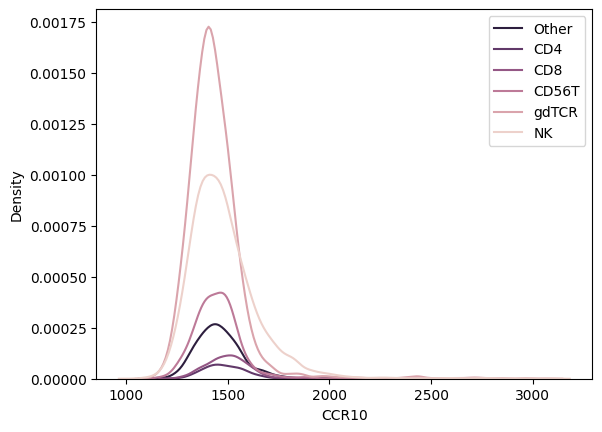

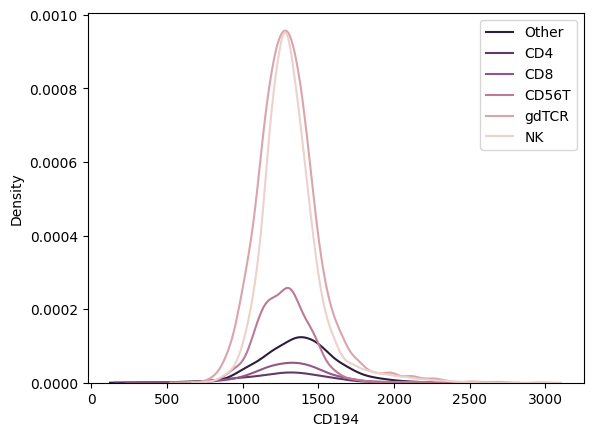

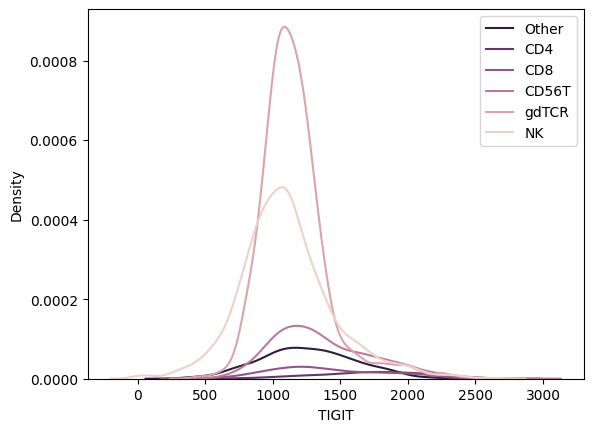

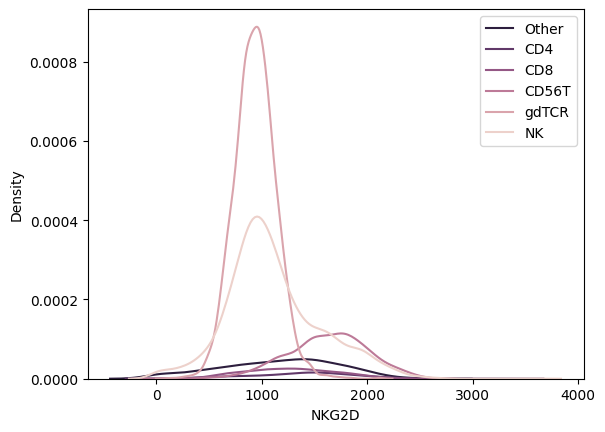

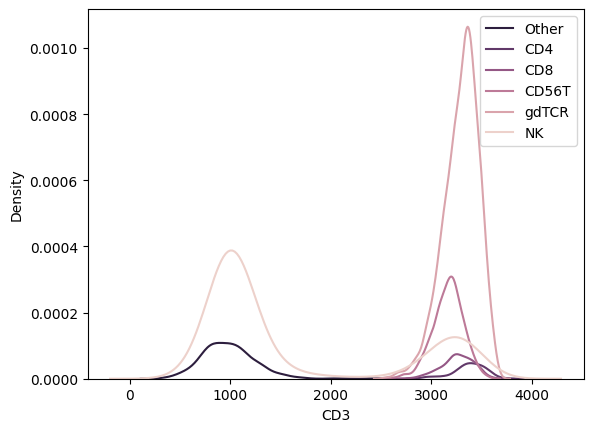

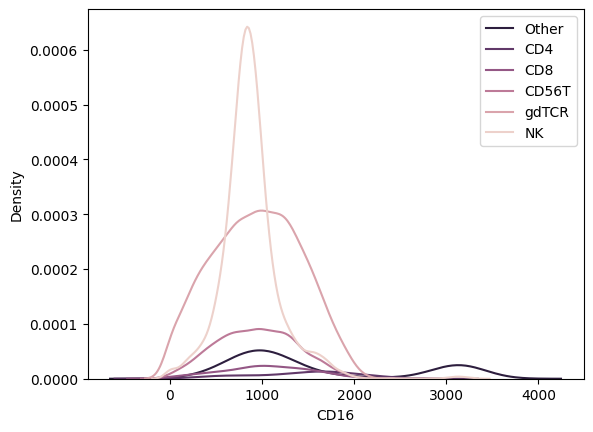

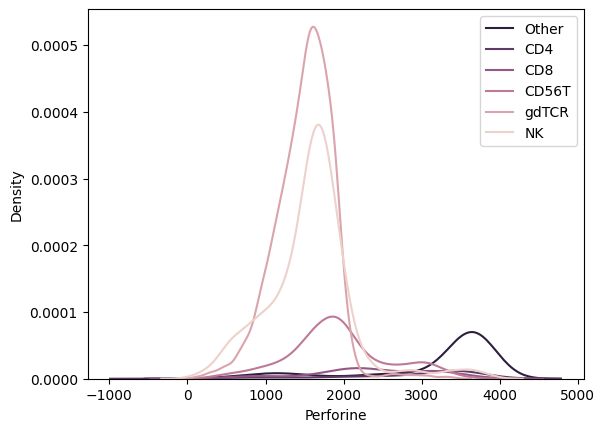

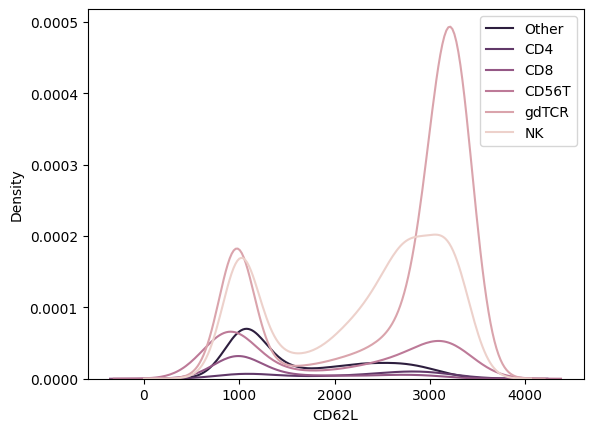

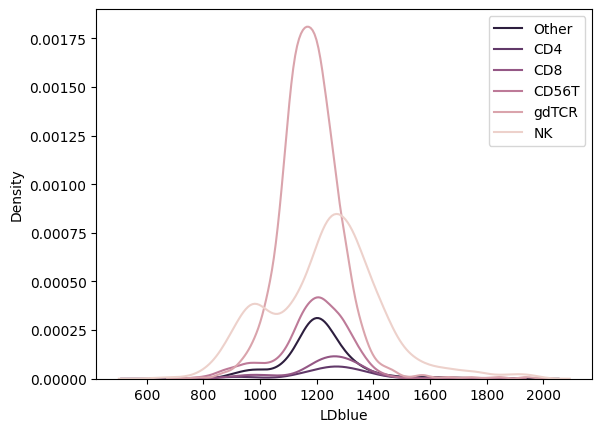

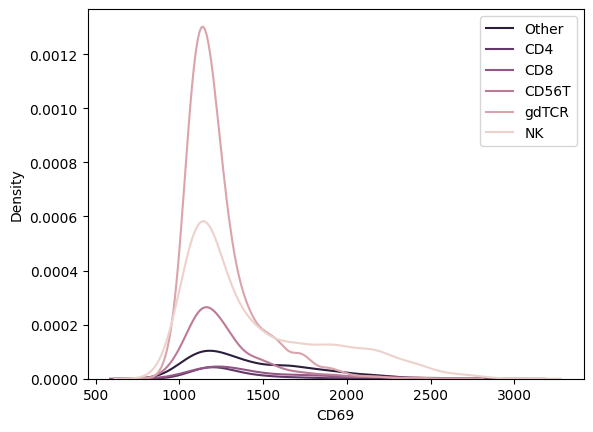

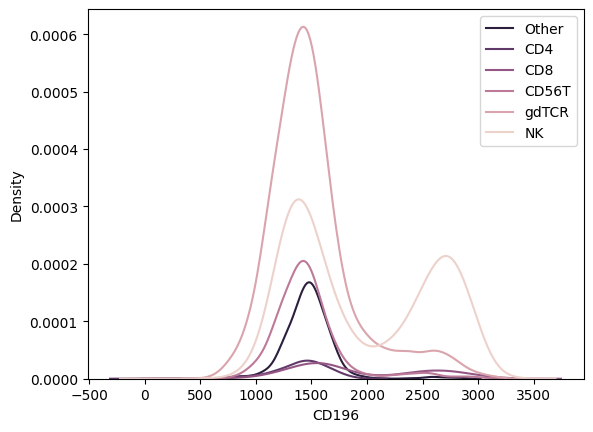

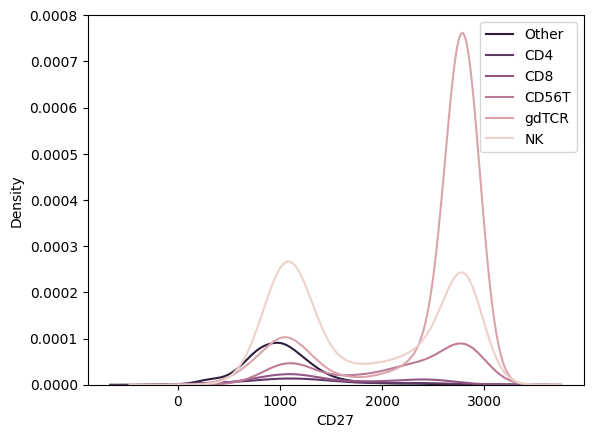

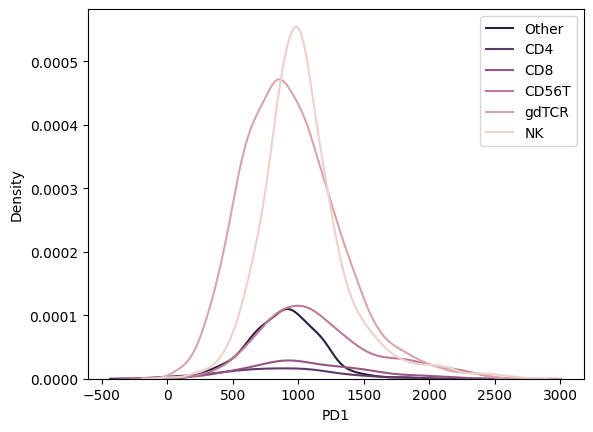

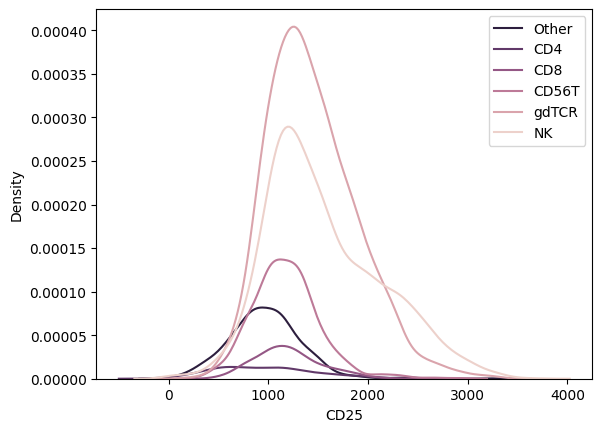

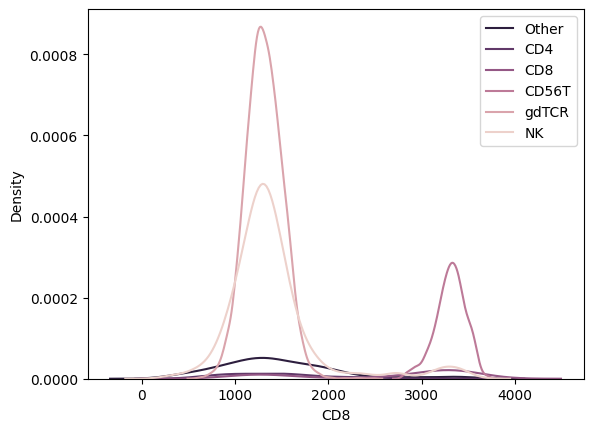

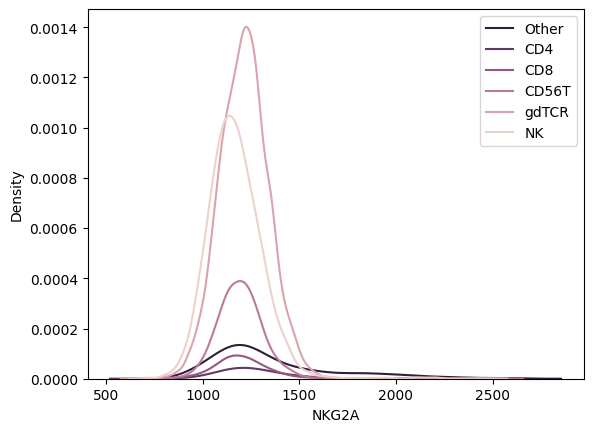

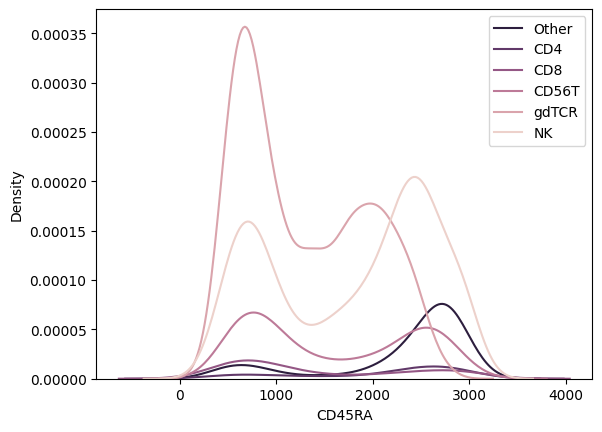

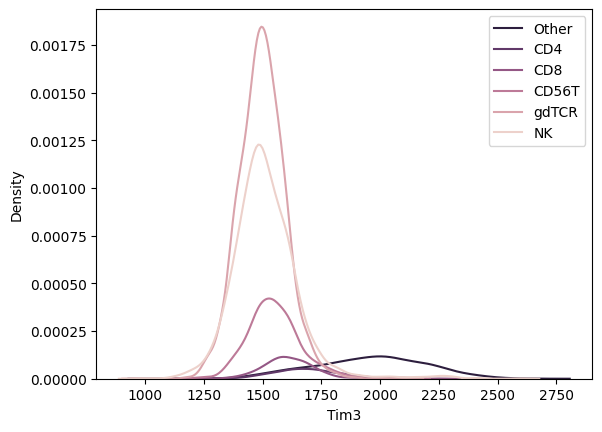

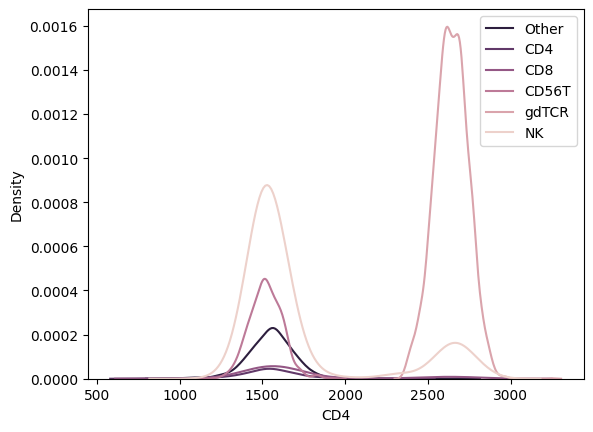

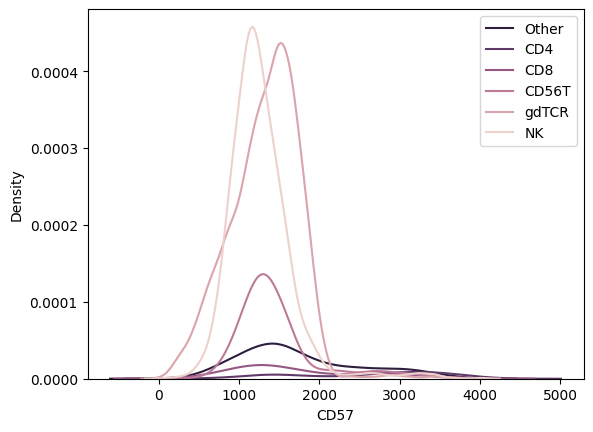

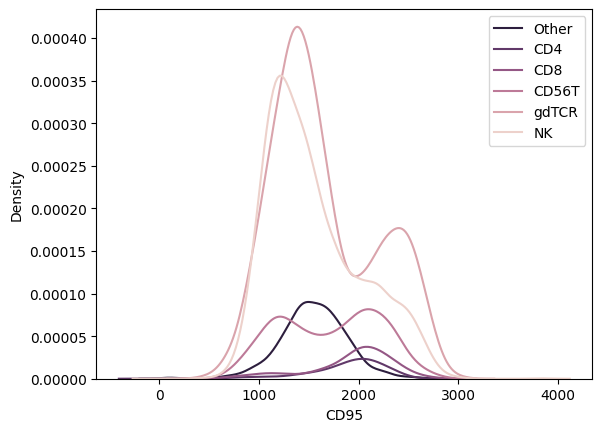

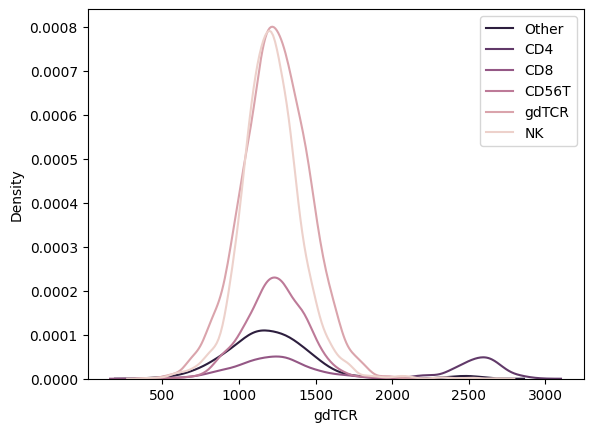

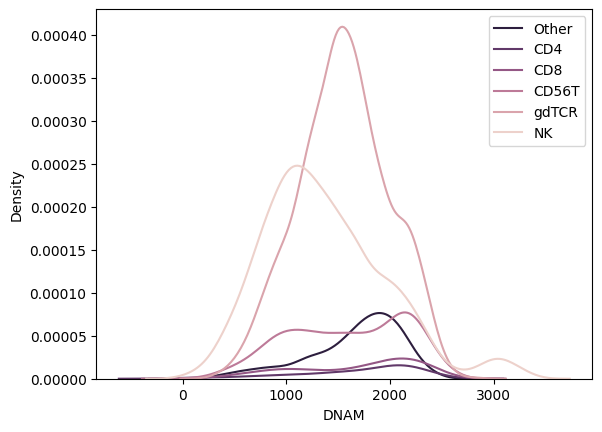

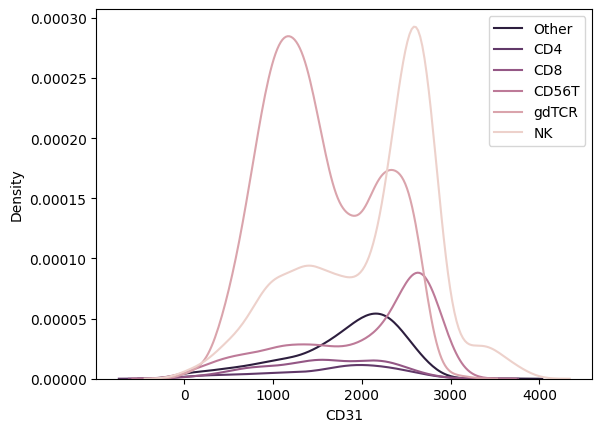

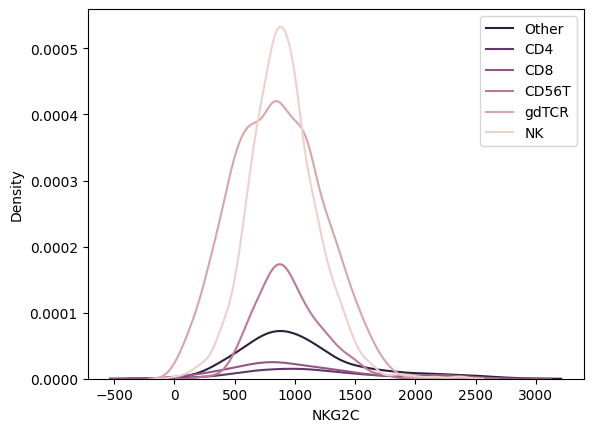

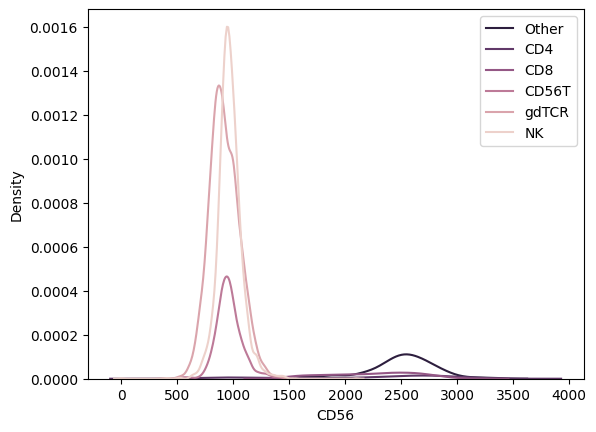

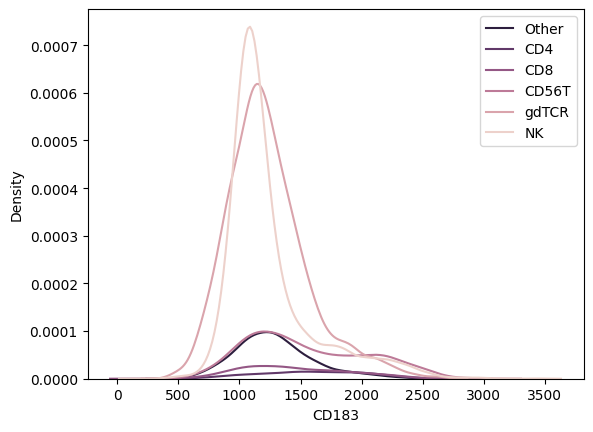

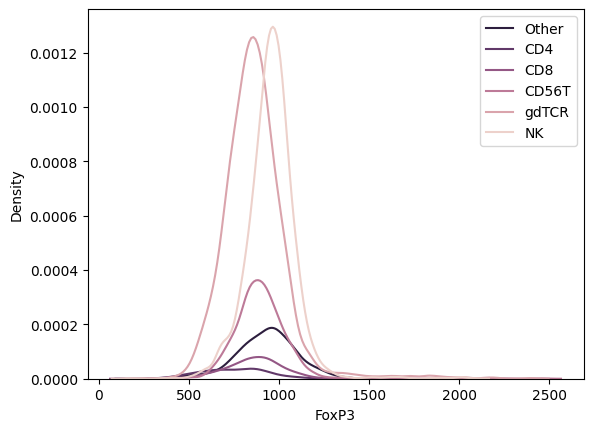

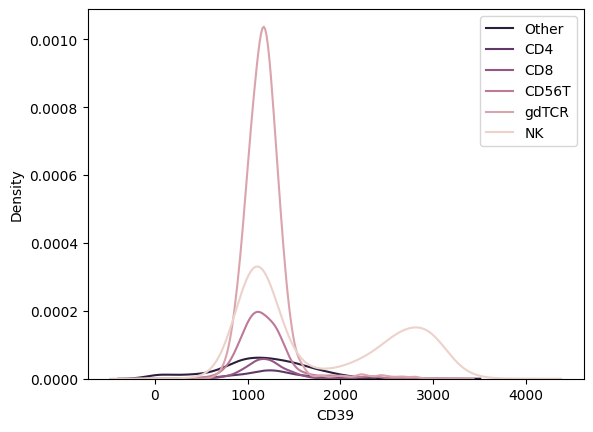

In [141]:
Z3JBclasses = ['Other', 'CD4','CD8','CD56T','gdTCR','NK']
for c in range(29):
    sns.kdeplot(data = Z3JBtrain, x = Z3JBtrain.columns[c], hue = 'Cell Class')
    plt.legend(labels = Z3JBclasses)
    plt.xlabel(Z3JBflowParams[c])
    plt.show()

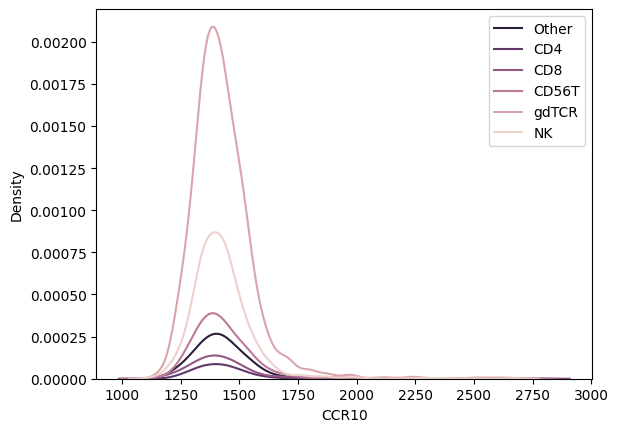

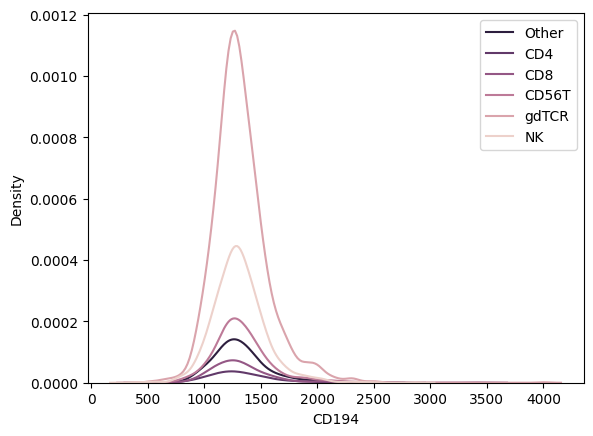

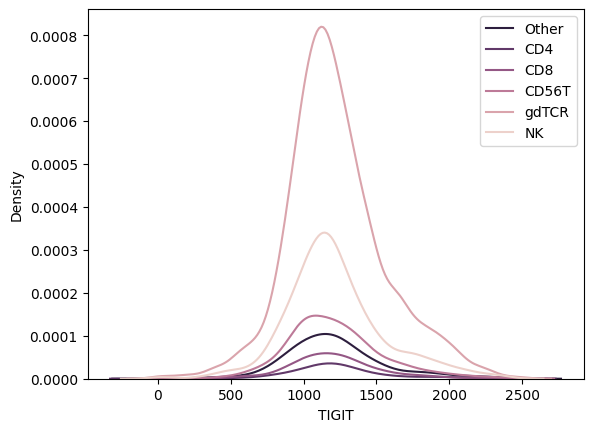

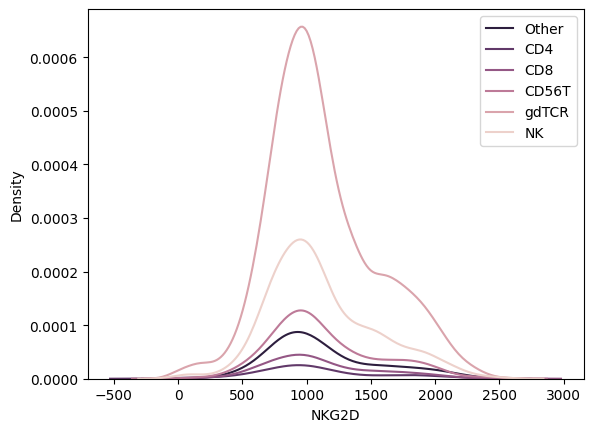

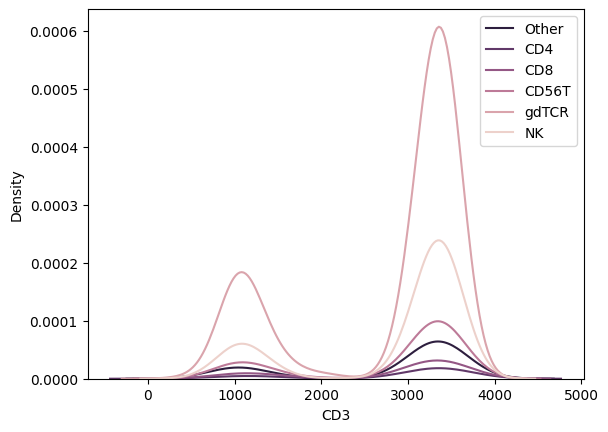

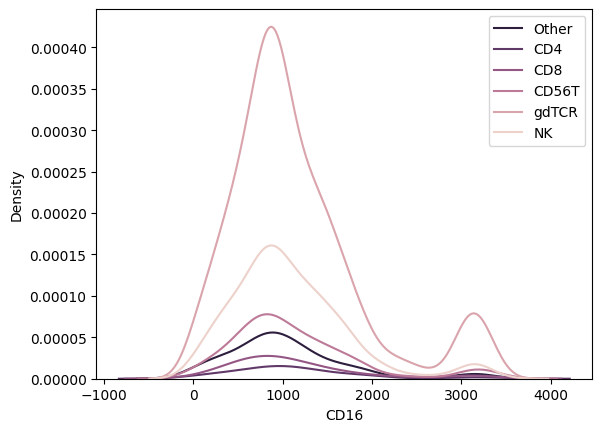

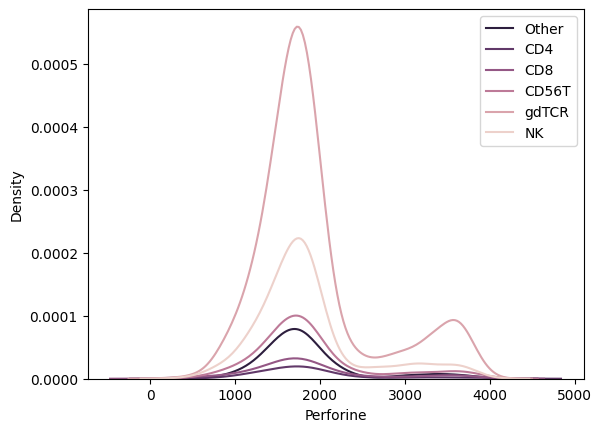

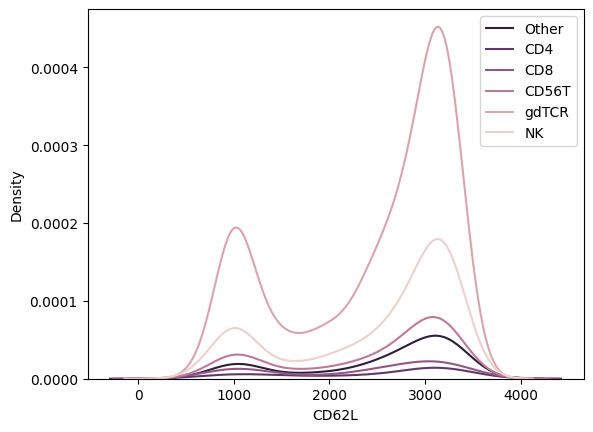

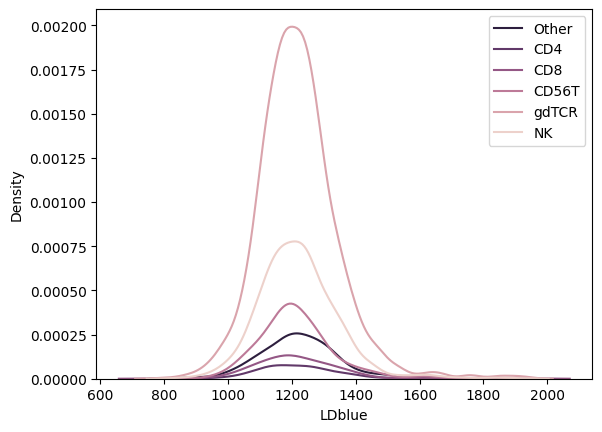

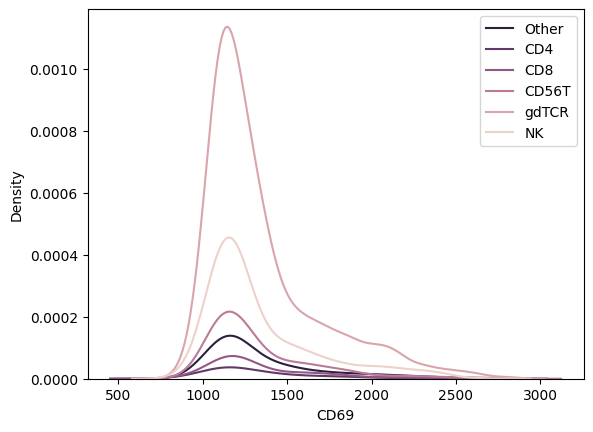

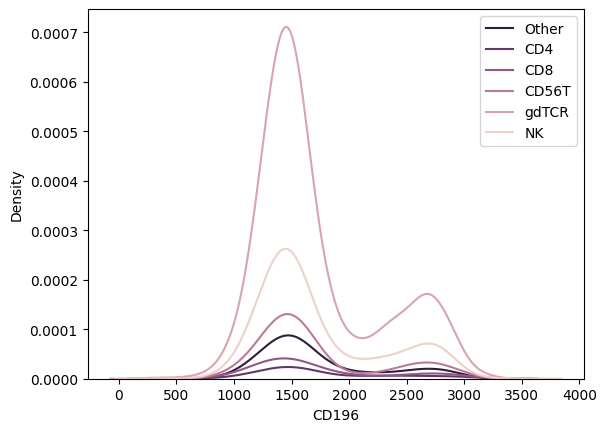

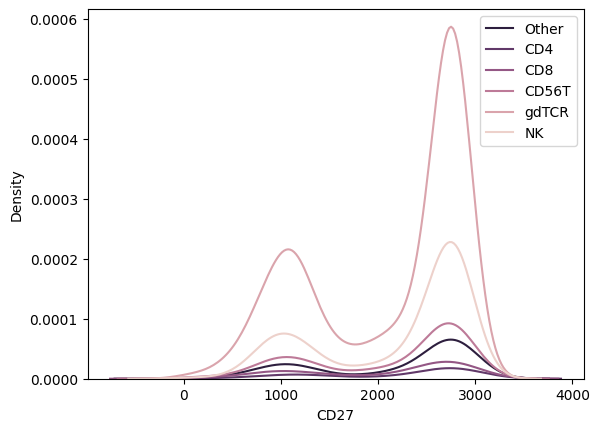

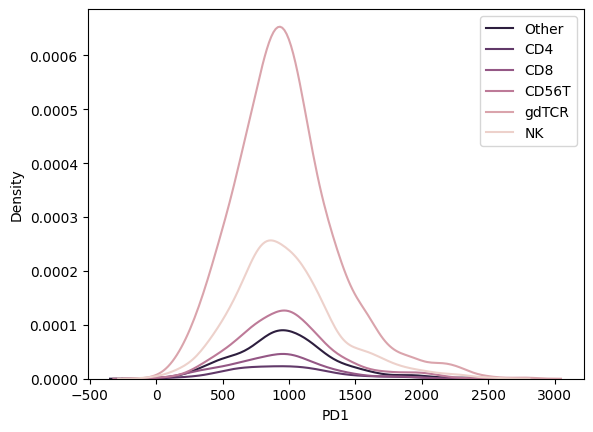

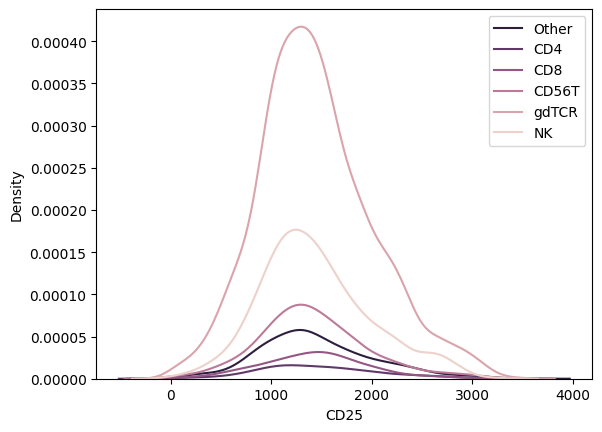

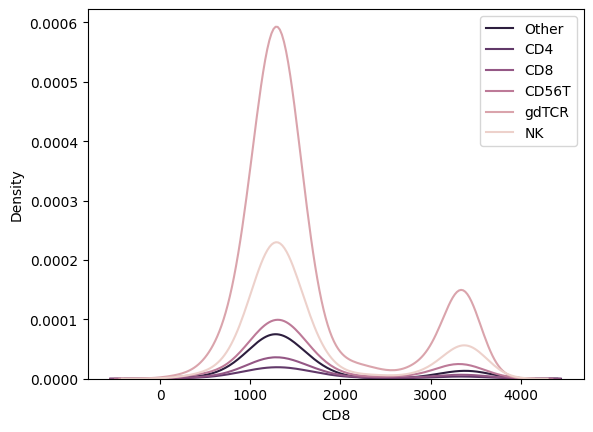

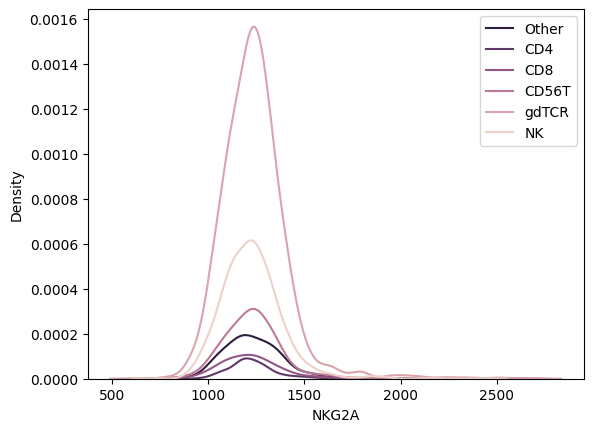

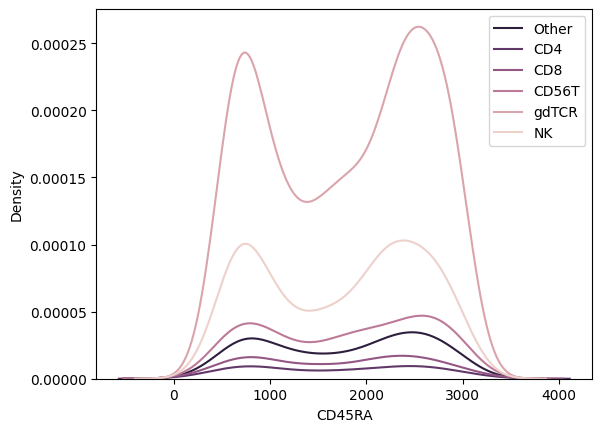

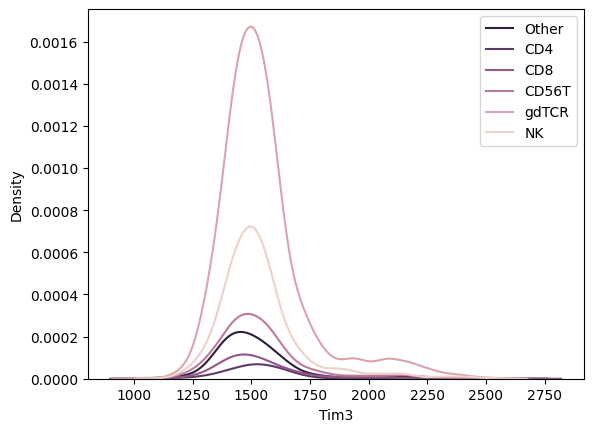

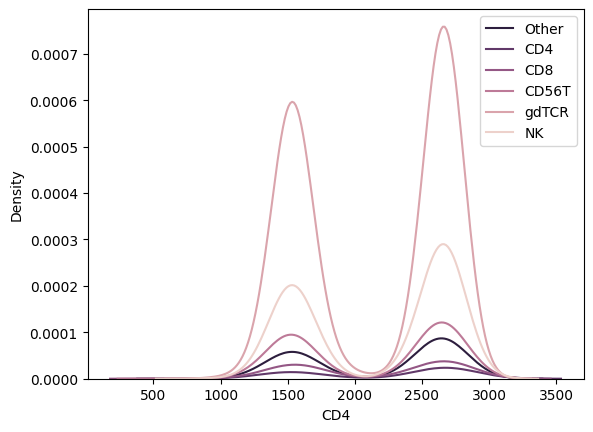

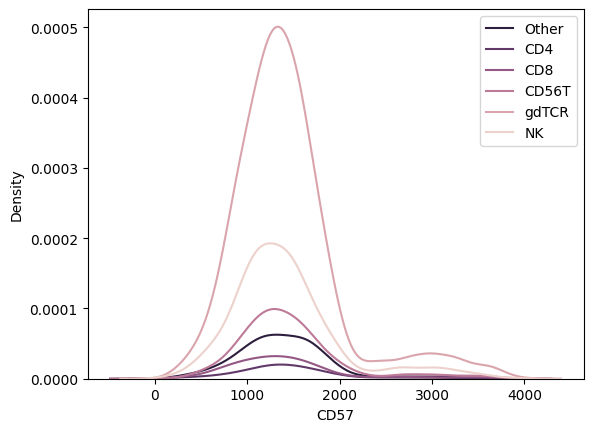

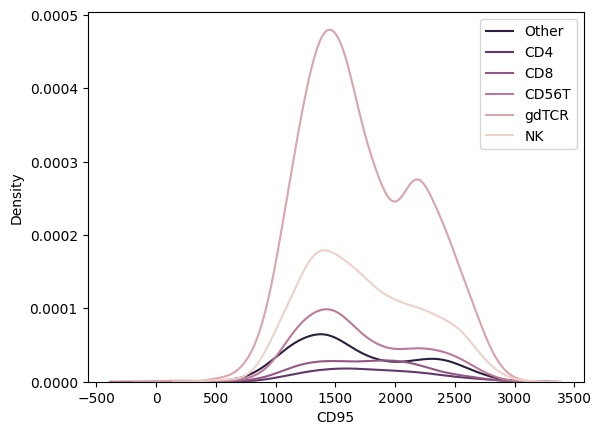

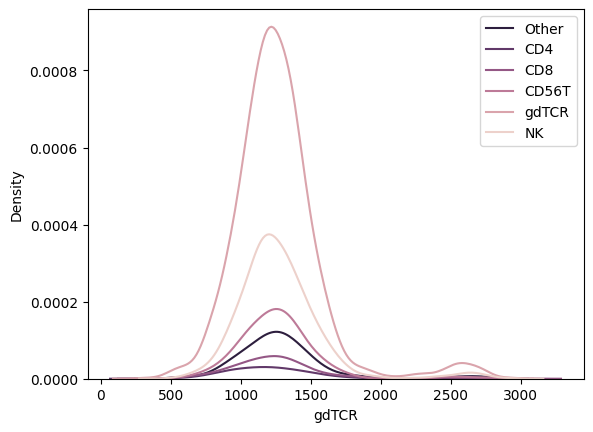

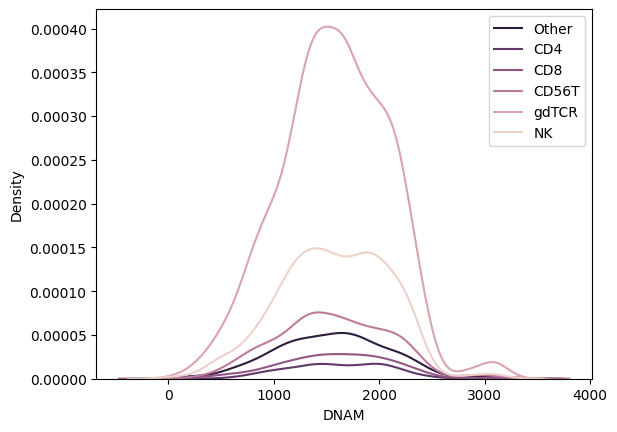

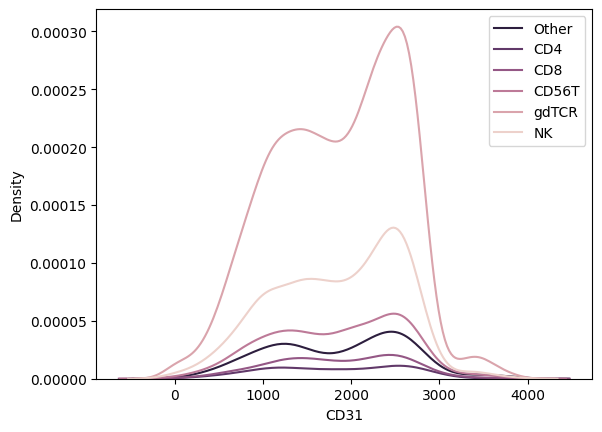

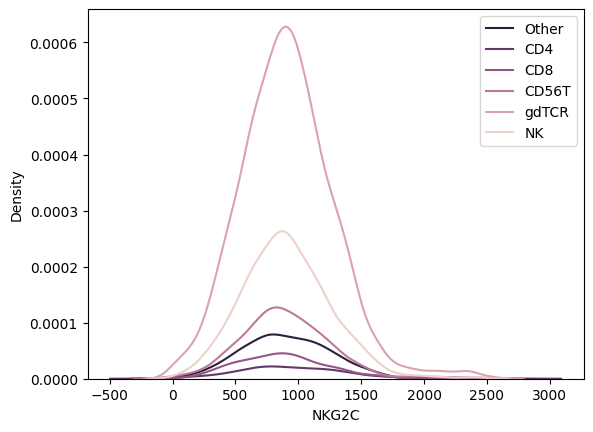

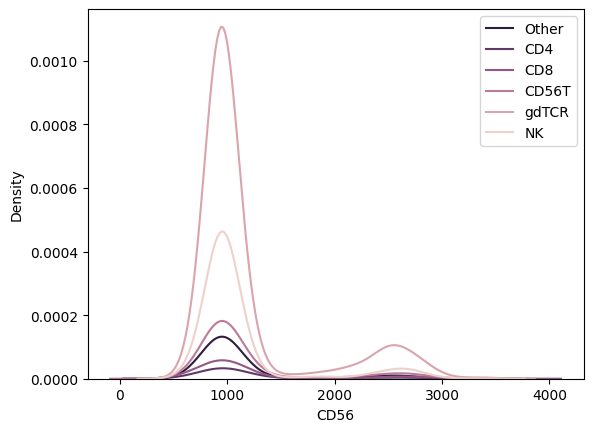

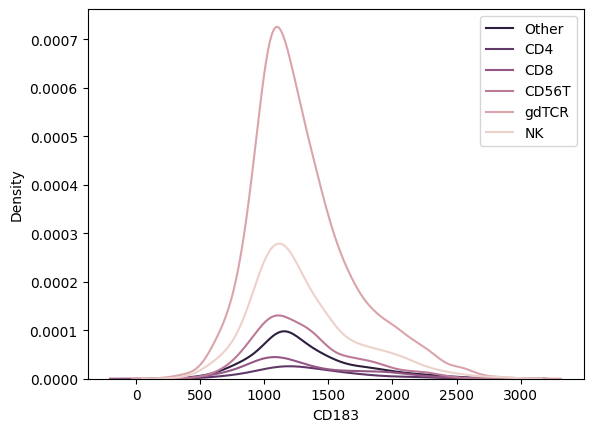

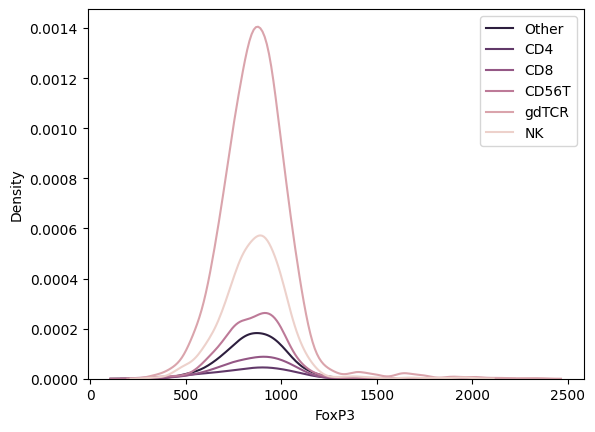

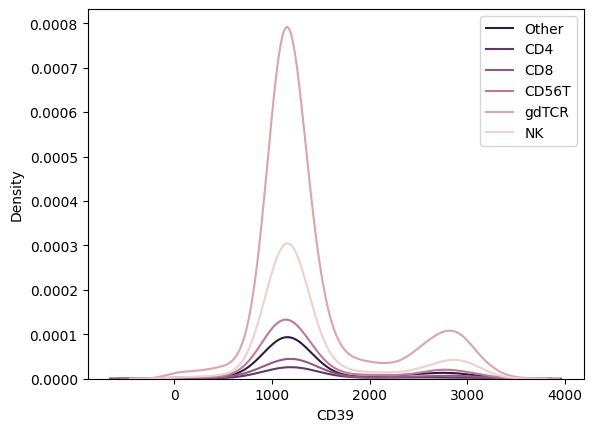

In [143]:
for c in range(29):
    sns.kdeplot(data = Z3JBtest, x = Z3JBtest.columns[c], hue = 'Cell Class')
    plt.legend(labels = Z3JBclasses)
    plt.xlabel(Z3JBflowParams[c])
    plt.show()
#for some reason this shows the same distributions? weird

In [139]:
# comp-antibody parameters for reference
Z3JBflowParams = Z3JBtrain.columns.get_level_values(1)[:29].tolist()
Z3JBflowParams

['CCR10',
 'CD194',
 'TIGIT',
 'NKG2D',
 'CD3',
 'CD16',
 'Perforine',
 'CD62L',
 'LDblue',
 'CD69',
 'CD196',
 'CD27',
 'PD1',
 'CD25',
 'CD8',
 'NKG2A',
 'CD45RA',
 'Tim3',
 'CD4',
 'CD57',
 'CD95',
 'gdTCR',
 'DNAM',
 'CD31',
 'NKG2C',
 'CD56',
 'CD183',
 'FoxP3',
 'CD39']

## Z6GL

In [70]:
base_Z6GL = "Z6GL_new"
wsp_Z6GL3 = os.path.join(base_Z6GL, "Z6GL3.wsp")
sample_Z6GL3 = os.path.join(base_Z6GL, "prior")

wsp_Z6GL12 = os.path.join(base_Z6GL, "Z6GL12.wsp")
sample_Z6GL12 = os.path.join(base_Z6GL, "posterior")

print(sample_Z6GL3)
print(sample_Z6GL12)

Z6GL_new\prior
Z6GL_new\posterior


In [72]:
Z6GL3 = fk.Workspace(wsp_Z6GL3, fcs_samples=sample_Z6GL3)

In [73]:
Z6GL12 = fk.Workspace(wsp_Z6GL12, fcs_samples=sample_Z6GL12)

In [74]:
display(Z6GL3.summary())
Z6GL12.summary()

samples  loaded_samples  gates  max_gate_depth
group_name                                                 
All Samples       57              57      5               2

samples  loaded_samples  gates  max_gate_depth
group_name                                                 
All Samples       33              33      5               2
test              11              11      5               2
train             22              22      5               2

In [75]:
Z6GL3alltrain = Z6GL3.get_sample_ids()
Z6GL3halftrain =  Z6GL3alltrain[:28]

Z6GL12train = Z6GL12.get_sample_ids("train")
Z6GL12test = Z6GL12.get_sample_ids("test")
Z6GL12test.sort(key = lambda x: int(x.split('_')[4]))
Z6GL12train.sort(key = lambda x: int(x.split('_')[4]))

In [76]:
level1 = Z6GL12.get_sample(Z6GL12test[0]).as_dataframe(source = 'raw').columns.get_level_values(1)
Z6GLflowParams = level1[8:12].append(level1[13:22]).tolist()
Z6GLclasses = ['Other', 'CD4 T Cells', 'CD8 T Cells']

In [77]:
Z6GLflowParams

['GrzmB',
 'CD8',
 'CD3',
 'Ki-67',
 'HLA-DR',
 'CD4',
 'CD38',
 'CD69',
 'CD45RA',
 'CD16',
 'CD56',
 'CCR7',
 'CXCR3']

In [78]:
Z6GL3.analyze_samples()

In [80]:
Z6GL12.analyze_samples()

In [81]:
def to_df(sample_list, wsp, source):
    dfFull = pd.DataFrame()
    for s in sample_list:
        sample = wsp.get_sample(s)
        sample.apply_transform(wsp.get_transforms(s))
        sampleDF = sample.as_dataframe(source = source).droplevel(1, axis = 1)
        if all(x in sampleDF.columns for x in ['Event #']):
            sampleDF = sampleDF.drop(['Event #'], axis = 1)
        if all(x in sampleDF.columns for x in ['FSC-W', 'SSC-W']):
            sampleDF = sampleDF.drop(['FSC-W', 'SSC-W'], axis = 1)
        sampleDF = sampleDF.drop(['FSC-H','FSC-A','SSC-H','SSC-A','Time', 'FJComp-BV510-A'], axis = 1)
        sampleDF['CD4'] = wsp.get_gate_membership(s, 'Q3: CD4+ , CD8-')
        sampleDF['CD8'] = wsp.get_gate_membership(s, 'Q1: CD4- , CD8+')
        sampleDF['Cell Class'] = sampleDF[['CD4','CD8']].apply(decide_class, axis = 1)
        sampleDF = sampleDF.drop(['CD4','CD8'], axis = 1)
        if 'all' in sampleDF.columns:
            sampleDF = sampleDF.drop('all', axis = 1)
        if 'Half' in sampleDF.columns:
            sampleDF = sampleDF.drop('Half', axis = 1)
        if 'Quarter' in sampleDF.columns:
            sampleDF = sampleDF.drop('Quarter', axis = 1)
        if 'DownsampleDP' in sampleDF.columns:
            sampleDF = sampleDF.drop('DownsampleDP', axis = 1)
        dfFull = pd.concat([dfFull, sampleDF], axis = 0, ignore_index = True)
    return dfFull

In [1915]:
Z6GL_trainprior = to_df(Z6GL3alltrain, Z6GL3, 'raw')
display(Z6GL_trainprior.head())
Z6GL_trainhalf = pd.concat([to_df(Z6GL3halftrain, Z6GL3, 'raw'), to_df(Z6GL12train[:11], Z6GL12, 'raw')], axis = 0, ignore_index = True)
display(Z6GL_trainhalf.head())
Z6GL_trainposterior = to_df(Z6GL12train, Z6GL12, 'raw')
display(Z6GL_trainposterior.head())

pnn  FJComp-APC-A  FJComp-APC-Cy7-A  FJComp-Alexa Fluor 700-A  FJComp-BV421-A  \
0    13368.285156        345.779083               2219.198486      205.573944   
1     -902.258789       -179.788635                494.268463      302.866669   
2    -3373.380859        335.456604               6500.949219      623.086609   
3     7332.844727       5623.822266               9224.978516      822.542908   
4    -1483.035156       -122.023155                670.119812       76.600365   

pnn  FJComp-BV605-A  FJComp-BV650-A  FJComp-BV711-A  FJComp-BV786-A  \
0        281.188141     1893.548584     -703.777283      -26.274397   
1       9361.109375     6232.827637      488.966949       82.093697   
2      -7198.008301    26575.646484   -10048.107422     1204.654907   
3      -1737.500000     1070.747803    -1600.390869     -237.469223   
4      11160.575195     8428.279297    -2570.563477      445.839630   

pnn  FJComp-FITC-A  FJComp-PE-A  FJComp-PE-CF594-A  FJComp-PE-Cy7-A  \
0      3184.265137 -1231.573730        7444.925781      1672.391113   
1      3948.217041  -508.620300        2394.508301      6540.010254   
2       721.852844    98.151184        2794.860840      1331.939331   
3      3464.929688  5872.108398        9115.530273      2358.325439   
4      3518.044678 -1075.642456        4532.162598      5326.232910   

pnn  FJComp-PerCP-Cy5-5-A  Cell Class  
0             2179.104492           0  
1              609.018494           0  
2             1550.773071           1  
3             2975.423828           2  
4              389.491425           0

pnn  FJComp-APC-A  FJComp-APC-Cy7-A  FJComp-Alexa Fluor 700-A  FJComp-BV421-A  \
0    13368.285156        345.779083               2219.198486      205.573944   
1     -902.258789       -179.788635                494.268463      302.866669   
2    -3373.380859        335.456604               6500.949219      623.086609   
3     7332.844727       5623.822266               9224.978516      822.542908   
4    -1483.035156       -122.023155                670.119812       76.600365   

pnn  FJComp-BV605-A  FJComp-BV650-A  FJComp-BV711-A  FJComp-BV786-A  \
0        281.188141     1893.548584     -703.777283      -26.274397   
1       9361.109375     6232.827637      488.966949       82.093697   
2      -7198.008301    26575.646484   -10048.107422     1204.654907   
3      -1737.500000     1070.747803    -1600.390869     -237.469223   
4      11160.575195     8428.279297    -2570.563477      445.839630   

pnn  FJComp-FITC-A  FJComp-PE-A  FJComp-PE-CF594-A  FJComp-PE-Cy7-A  \
0      3184.265137 -1231.573730        7444.925781      1672.391113   
1      3948.217041  -508.620300        2394.508301      6540.010254   
2       721.852844    98.151184        2794.860840      1331.939331   
3      3464.929688  5872.108398        9115.530273      2358.325439   
4      3518.044678 -1075.642456        4532.162598      5326.232910   

pnn  FJComp-PerCP-Cy5-5-A  Cell Class  
0             2179.104492           0  
1              609.018494           0  
2             1550.773071           1  
3             2975.423828           2  
4              389.491425           0

pnn  FJComp-APC-A  FJComp-APC-Cy7-A  FJComp-Alexa Fluor 700-A  FJComp-BV421-A  \
0       -7.943987          1.644305               2148.254395      530.398376   
1       68.247284         20.493227                 26.054562      519.474243   
2     -210.903976         35.143372               1456.178833      593.001770   
3       32.160839         18.660925               2440.278564      527.491333   
4     -299.954254         -0.109805               2033.841309      475.618347   

pnn  FJComp-BV605-A  FJComp-BV650-A  FJComp-BV711-A  FJComp-BV786-A  \
0        158.053162     5211.845703      707.900391      -38.835247   
1      26663.091797     -337.667938     1452.930664      134.130554   
2        911.984802     6158.230957     -194.975372      133.018417   
3        472.963226     3063.341553     1450.278687      673.696594   
4        431.336975     7155.108398      550.109863      175.675644   

pnn  FJComp-FITC-A  FJComp-PE-A  FJComp-PE-CF594-A  FJComp-PE-Cy7-A  \
0       375.055511    69.926476          67.284264       506.964386   
1      2599.214844   137.331299         -95.135406       866.731689   
2       315.951477   -52.853542          91.036598       317.650818   
3      2466.688232     4.469171         208.507233       869.709167   
4       350.824219    21.878805          37.792675       582.889526   

pnn  FJComp-PerCP-Cy5-5-A  Cell Class  
0               23.199081           1  
1               78.009995           0  
2              125.283005           1  
3              166.166962           1  
4                4.932796           1

In [87]:
Z6GL_trainpriorT = to_df(Z6GL3alltrain, Z6GL3, 'xform')
display(Z6GL_trainpriorT.head())
Z6GL_trainhalfT = pd.concat([to_df(Z6GL3halftrain, Z6GL3, 'xform'), to_df(Z6GL12train[:11], Z6GL12, 'xform')], axis = 0, ignore_index = True)
display(Z6GL_trainhalfT.head())
Z6GL_trainposteriorT = to_df(Z6GL12train, Z6GL12, 'raw')
display(Z6GL_trainposteriorT.head())

pnn  FJComp-APC-A  FJComp-APC-Cy7-A  FJComp-Alexa Fluor 700-A  FJComp-BV421-A  \
0     2864.349930       1191.234076               2015.108837     1086.110287   
1      307.241086        787.622821               1296.982541     1159.513528   
2        0.000000       1183.645659               2542.907372     1382.704608   
3     2598.010856       2475.659837               2701.339199     1502.981695   
4       52.275214        832.140169               1412.456841      986.632667   

pnn  FJComp-BV605-A  FJComp-BV650-A  FJComp-BV711-A  FJComp-BV786-A  \
0       1143.323475     1931.544654      420.776479      906.529449   
1       2707.863510     2523.473022     1293.327554      990.900551   
2          0.000000     3157.036153        0.000000     1692.241717   
3          0.000000     1631.627377       11.795400      743.627067   
4       2785.583766     2660.934285        0.000000     1263.245574   

pnn  FJComp-FITC-A  FJComp-PE-A  FJComp-PE-CF594-A  FJComp-PE-Cy7-A  \
0      2200.301754   150.243560        2604.906098      1865.610438   
1      2306.720155   547.171711        2054.736504      2545.664428   
2      1444.194373  1003.365024        2134.310989      1744.856021   
3      2242.455774  2495.815510        2696.018000      2046.825151   
4      2249.999268   220.054814        2373.459187      2450.156040   

pnn  FJComp-PerCP-Cy5-5-A  Cell Class  
0             2005.562644           0  
1             1373.641122           0  
2             1825.456111           1  
3             2166.118235           2  
4             1223.051550           0

pnn  FJComp-APC-A  FJComp-APC-Cy7-A  FJComp-Alexa Fluor 700-A  FJComp-BV421-A  \
0     2864.349930       1191.234076               2015.108837     1086.110287   
1      307.241086        787.622821               1296.982541     1159.513528   
2        0.000000       1183.645659               2542.907372     1382.704608   
3     2598.010856       2475.659837               2701.339199     1502.981695   
4       52.275214        832.140169               1412.456841      986.632667   

pnn  FJComp-BV605-A  FJComp-BV650-A  FJComp-BV711-A  FJComp-BV786-A  \
0       1143.323475     1931.544654      420.776479      906.529449   
1       2707.863510     2523.473022     1293.327554      990.900551   
2          0.000000     3157.036153        0.000000     1692.241717   
3          0.000000     1631.627377       11.795400      743.627067   
4       2785.583766     2660.934285        0.000000     1263.245574   

pnn  FJComp-FITC-A  FJComp-PE-A  FJComp-PE-CF594-A  FJComp-PE-Cy7-A  \
0      2200.301754   150.243560        2604.906098      1865.610438   
1      2306.720155   547.171711        2054.736504      2545.664428   
2      1444.194373  1003.365024        2134.310989      1744.856021   
3      2242.455774  2495.815510        2696.018000      2046.825151   
4      2249.999268   220.054814        2373.459187      2450.156040   

pnn  FJComp-PerCP-Cy5-5-A  Cell Class  
0             2005.562644           0  
1             1373.641122           0  
2             1825.456111           1  
3             2166.118235           2  
4             1223.051550           0

pnn  FJComp-APC-A  FJComp-APC-Cy7-A  FJComp-Alexa Fluor 700-A  FJComp-BV421-A  \
0       -7.943987          1.644305               2148.254395      530.398376   
1       68.247284         20.493227                 26.054562      519.474243   
2     -210.903976         35.143372               1456.178833      593.001770   
3       32.160839         18.660925               2440.278564      527.491333   
4     -299.954254         -0.109805               2033.841309      475.618347   

pnn  FJComp-BV605-A  FJComp-BV650-A  FJComp-BV711-A  FJComp-BV786-A  \
0        158.053162     5211.845703      707.900391      -38.835247   
1      26663.091797     -337.667938     1452.930664      134.130554   
2        911.984802     6158.230957     -194.975372      133.018417   
3        472.963226     3063.341553     1450.278687      673.696594   
4        431.336975     7155.108398      550.109863      175.675644   

pnn  FJComp-FITC-A  FJComp-PE-A  FJComp-PE-CF594-A  FJComp-PE-Cy7-A  \
0       375.055511    69.926476          67.284264       506.964386   
1      2599.214844   137.331299         -95.135406       866.731689   
2       315.951477   -52.853542          91.036598       317.650818   
3      2466.688232     4.469171         208.507233       869.709167   
4       350.824219    21.878805          37.792675       582.889526   

pnn  FJComp-PerCP-Cy5-5-A  Cell Class  
0               23.199081           1  
1               78.009995           0  
2              125.283005           1  
3              166.166962           1  
4                4.932796           1

In [88]:
Z6GL_test = to_df(Z6GL12test, Z6GL12, 'raw')
display(Z6GL_test.head())
Z6GL_testT = to_df(Z6GL12test, Z6GL12, 'xform')
display(Z6GL_testT.head())

pnn  FJComp-APC-A  FJComp-APC-Cy7-A  FJComp-Alexa Fluor 700-A  FJComp-BV421-A  \
0     1565.684692         -2.789852                 65.891777      372.164886   
1       41.479702        123.658386               1652.953125      492.030914   
2       61.344593         86.845108               2211.339111      432.586578   
3       88.988724        -17.843069               1302.374390      285.542999   
4       48.311413         33.851555                 71.552780      439.058746   

pnn  FJComp-BV605-A  FJComp-BV650-A  FJComp-BV711-A  FJComp-BV786-A  \
0       -122.526939       66.767868     5262.536621       89.721123   
1        702.749756     6820.260742     2984.542480       13.838192   
2        210.121323       23.005817      -37.869530      292.068970   
3        -42.502602     4703.618164     1947.964966        1.663341   
4       9153.890625      124.029579      510.905212        7.319542   

pnn  FJComp-FITC-A   FJComp-PE-A  FJComp-PE-CF594-A  FJComp-PE-Cy7-A  \
0     11732.283203  31715.189453        2450.305908        61.117966   
1       517.005493     91.058159          75.435112      1142.605469   
2       485.408478     45.206776         218.500046       122.655479   
3      1456.799072    -17.117168         129.192459      1171.245850   
4      3076.392578    -43.971600         236.963196       468.700775   

pnn  FJComp-PerCP-Cy5-5-A  Cell Class  
0              186.278732           0  
1               94.828743           1  
2              148.153351           0  
3              -14.097735           1  
4              118.111549           0

pnn  FJComp-APC-A  FJComp-APC-Cy7-A  FJComp-Alexa Fluor 700-A  FJComp-BV421-A  \
0     1830.544414        924.826191                978.308207     1210.502978   
1      959.312094       1023.124942               1859.392825     1295.441042   
2      974.771680        994.590546               2013.252412     1253.879923   
3      996.254839        913.097581               1733.040763     1146.584157   
4      964.630395        953.372163                982.709606     1258.460587   

pnn  FJComp-BV605-A  FJComp-BV650-A  FJComp-BV711-A  FJComp-BV786-A  \
0        831.750391      978.989475     2444.490640      996.823403   
1       1432.596015     2564.929374     2167.666422      937.782221   
2       1089.579830      944.924413      897.498902     1151.462670   
3        893.891510     2391.231394     1946.534105      928.296050   
4       2697.890851     1023.412074     1308.389179      932.703238   

pnn  FJComp-FITC-A  FJComp-PE-A  FJComp-PE-CF594-A  FJComp-PE-Cy7-A  \
0      2807.481285  3230.984198        2066.681006       974.595395   
1      1312.547604   997.861254         985.727139      1664.862227   
2      1290.868978   962.213707        1095.963893      1022.349055   
3      1792.251680   913.663117        1027.404559      1677.647495   
4      2182.971613   892.747858        1109.989416      1279.268241   

pnn  FJComp-PerCP-Cy5-5-A  Cell Class  
0             1071.353064           0  
1             1000.787445           1  
2             1042.044134           0  
3              916.015562           1  
4             1018.832596           0

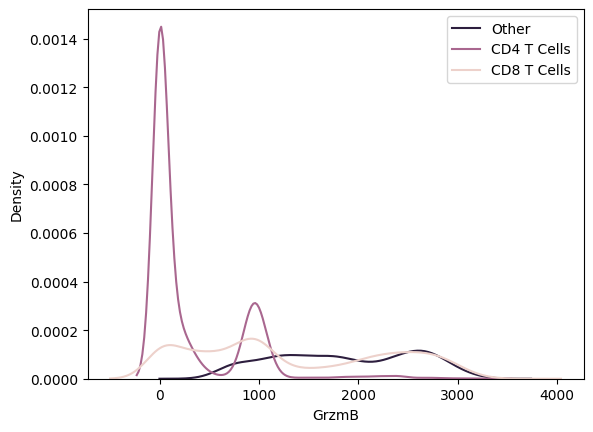

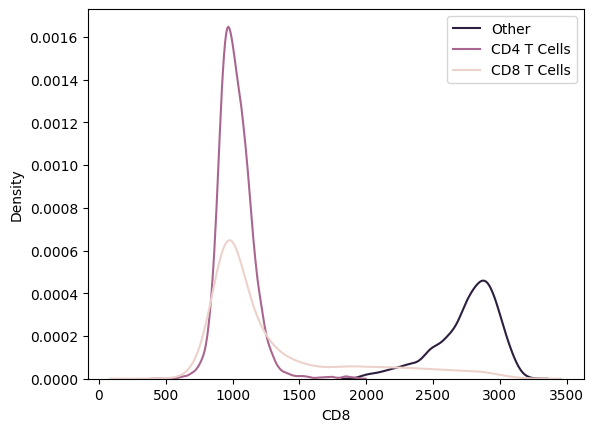

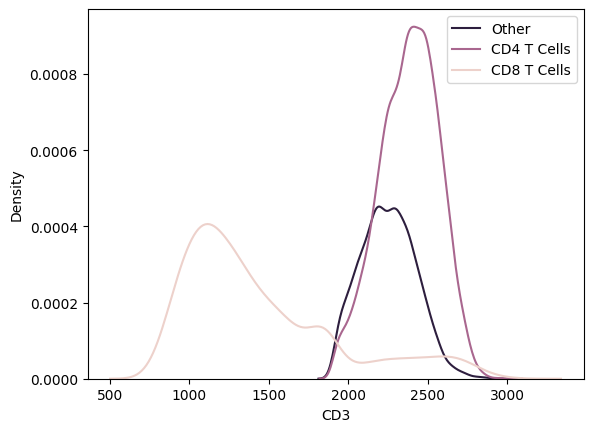

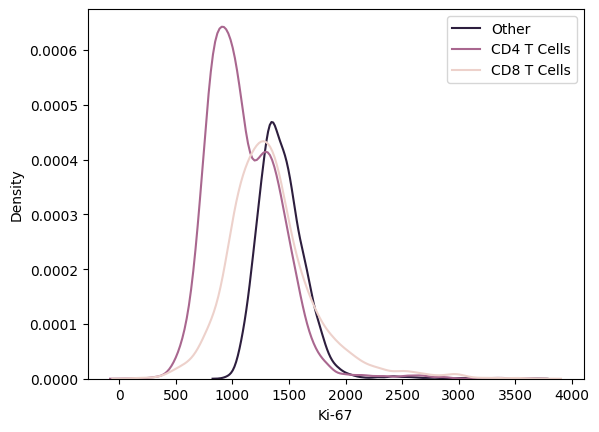

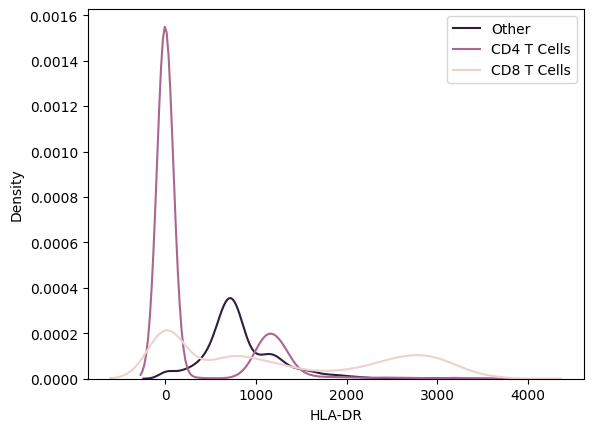

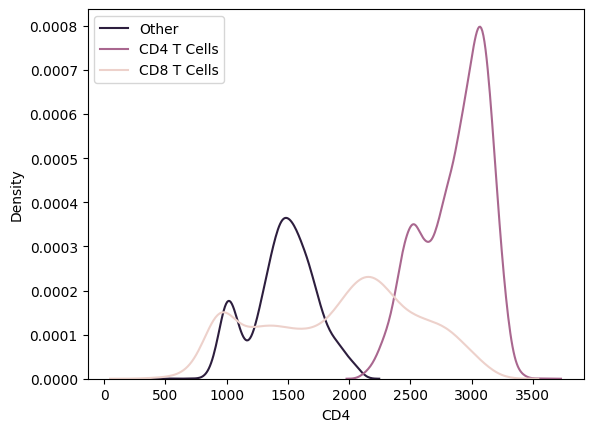

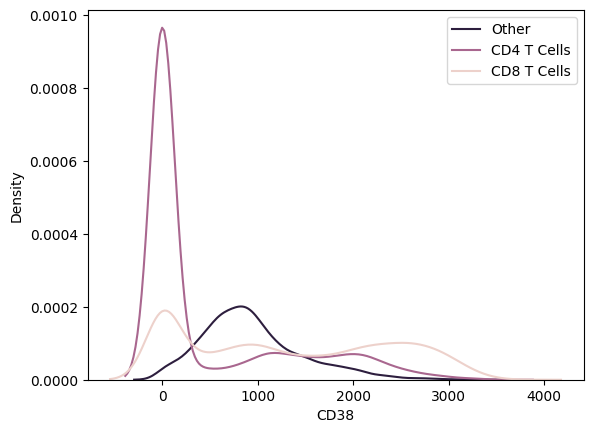

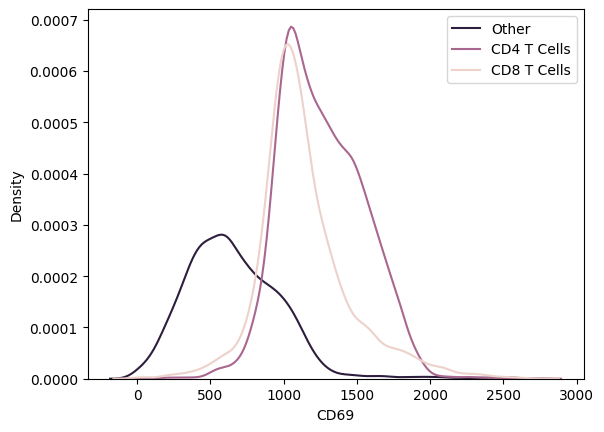

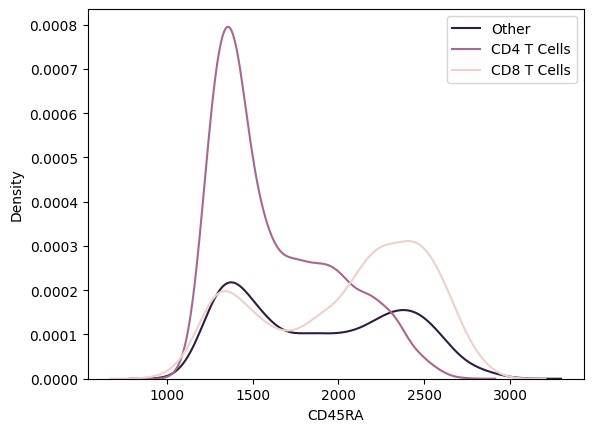

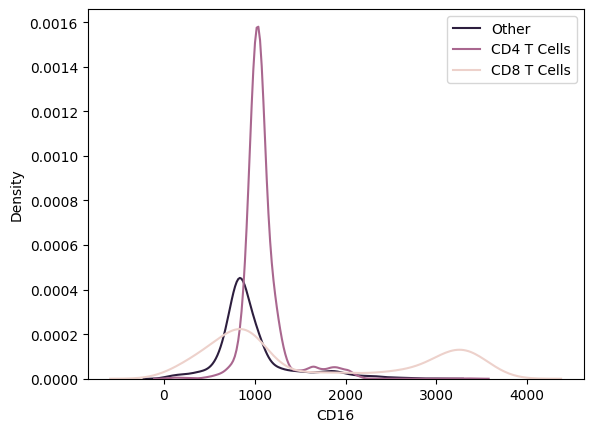

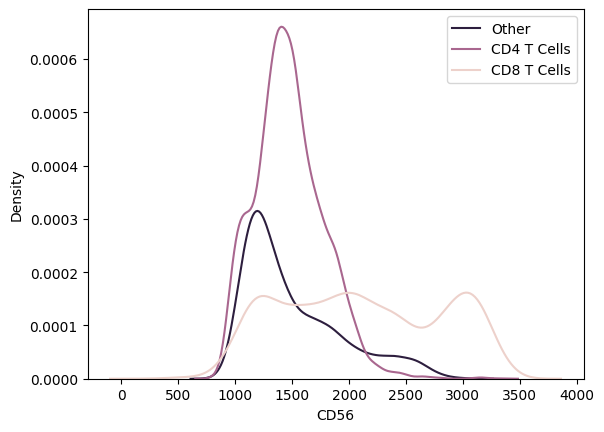

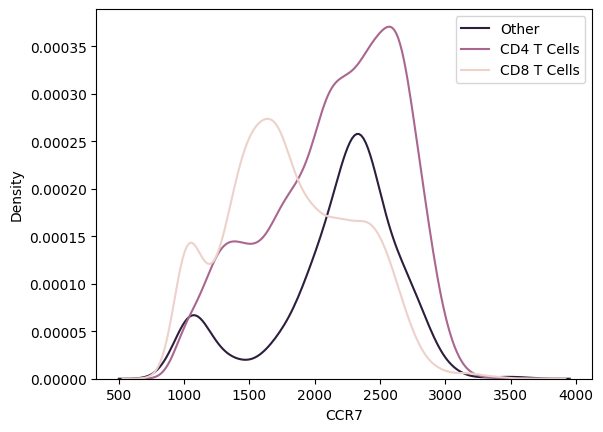

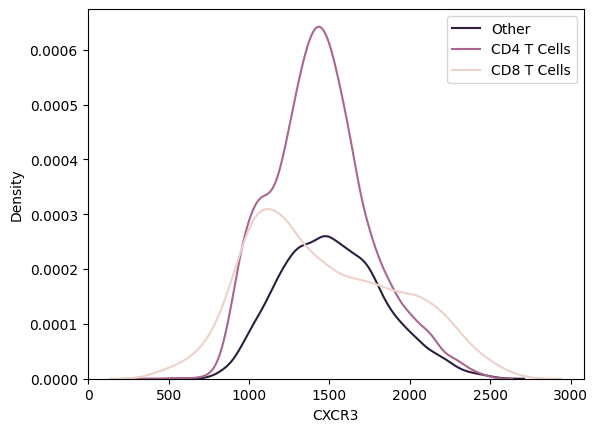

In [133]:
for c in range(13):
    sns.kdeplot(data = Z6GL_trainpriorT, x = Z6GL_trainpriorT.columns[c], hue = 'Cell Class')
    plt.legend(labels = Z6GLclasses)
    plt.xlabel(Z6GLflowParams[c])
    plt.show()

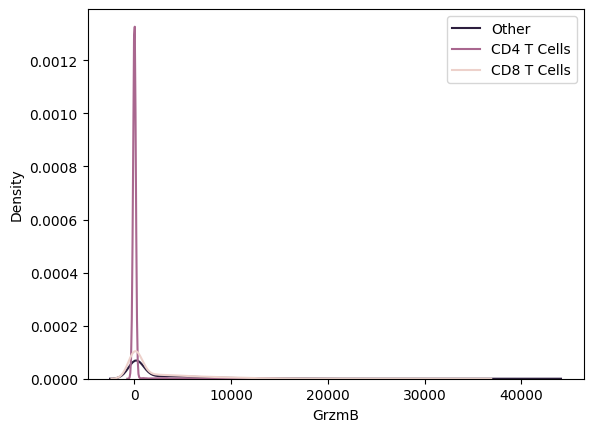

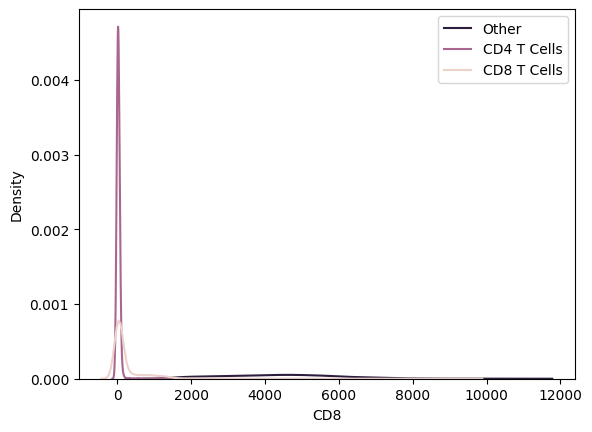

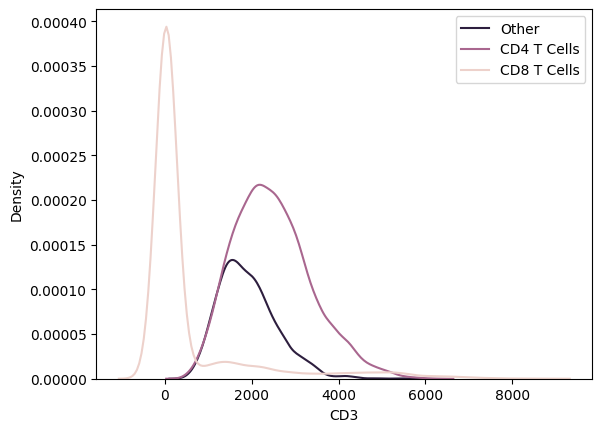

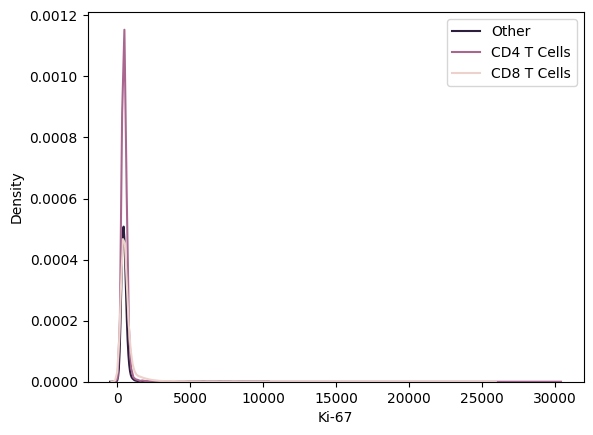

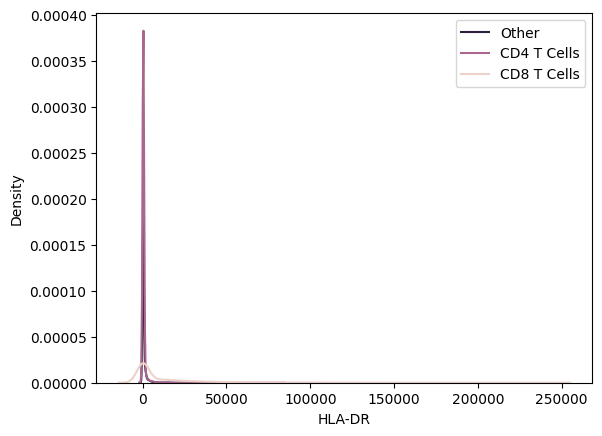

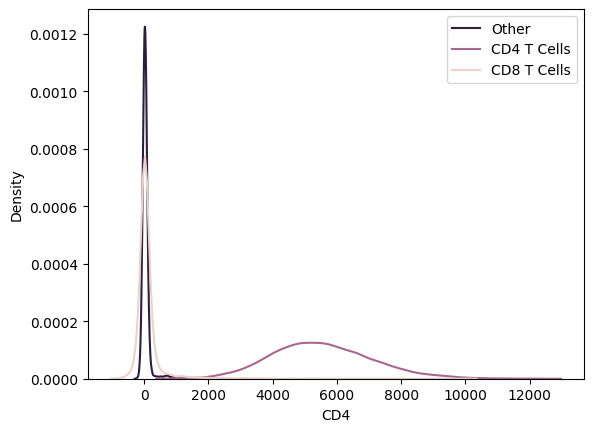

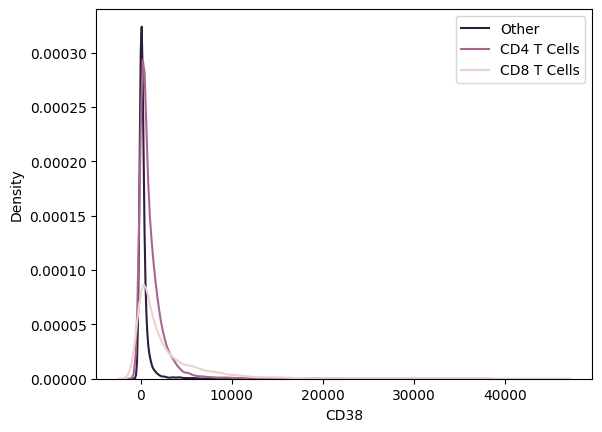

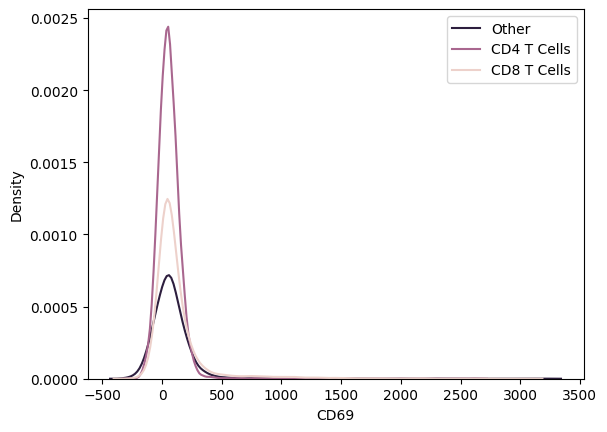

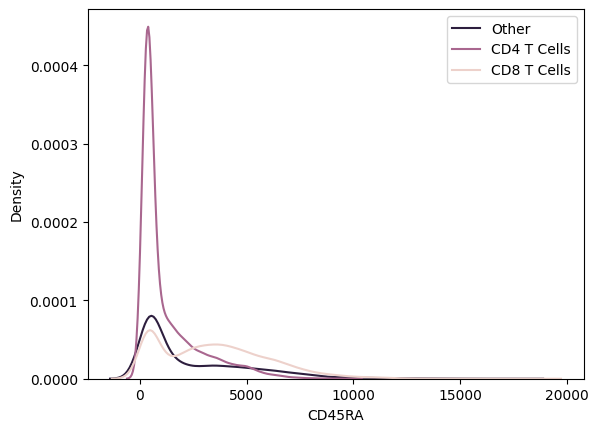

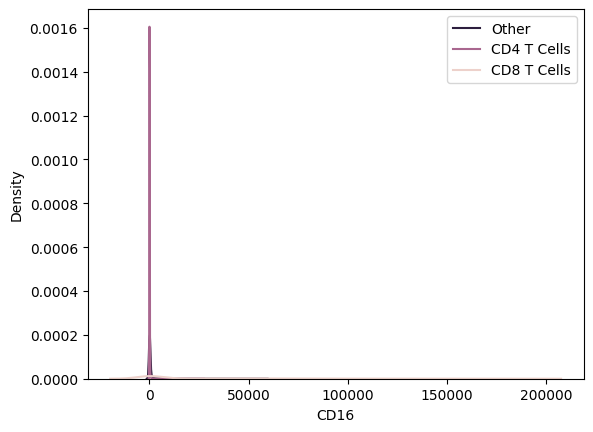

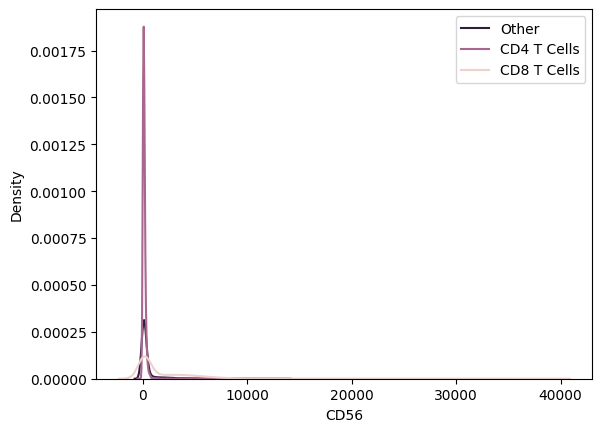

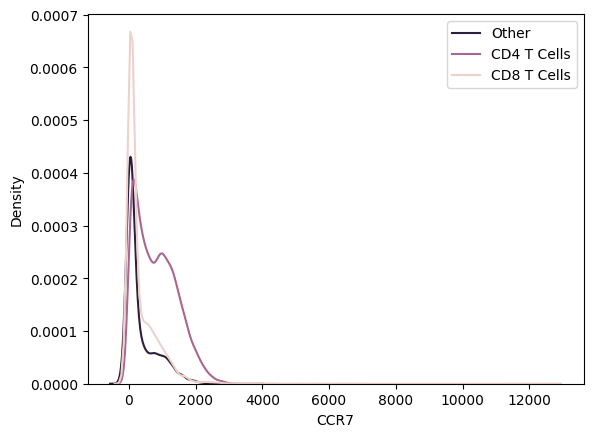

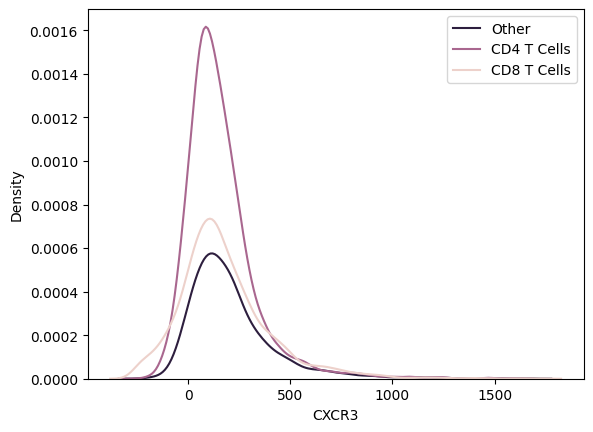

In [127]:
for c in range(13):
    sns.kdeplot(data = Z6GL_trainposteriorT, x = Z6GL_trainposteriorT.columns[c], hue = 'Cell Class')
    plt.legend(labels = Z6GLclasses)
    plt.xlabel(Z6GLflowParams[c])
    plt.show()

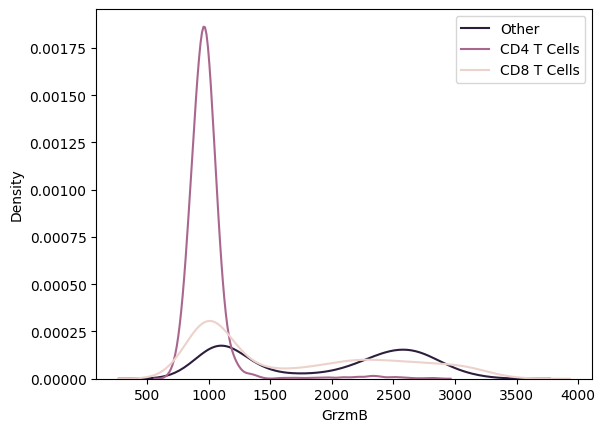

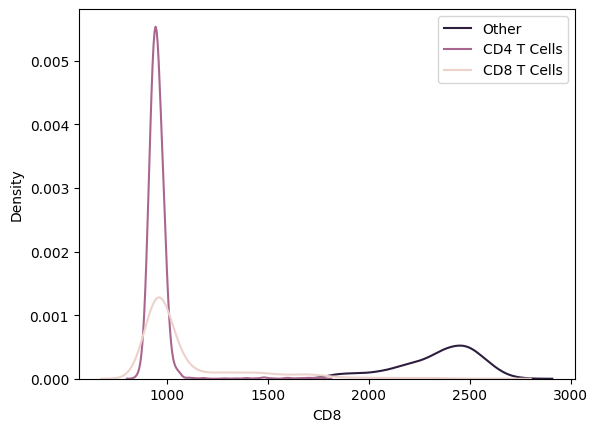

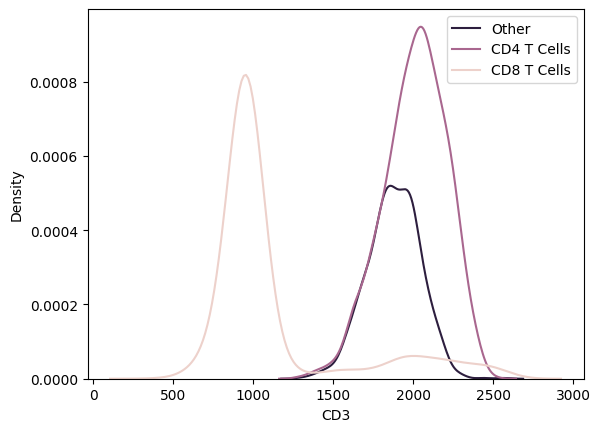

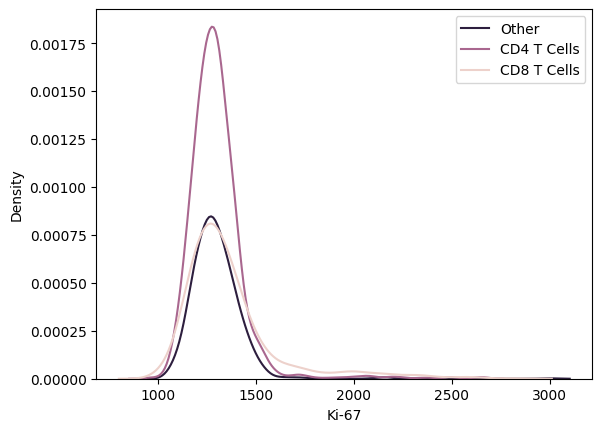

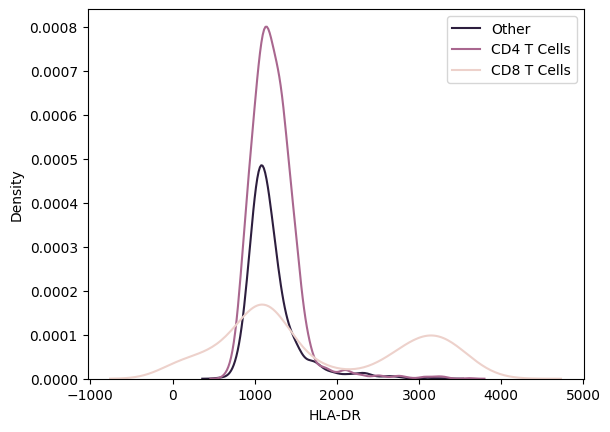

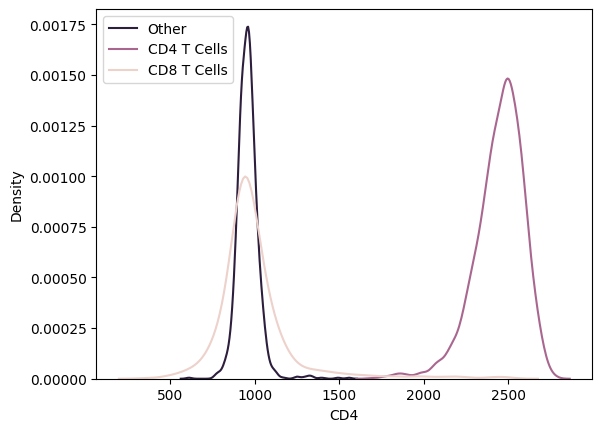

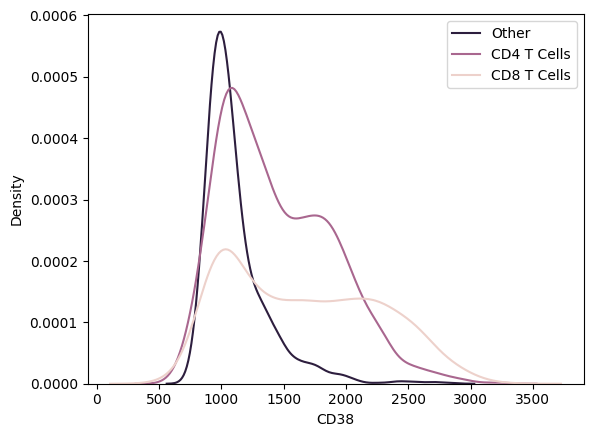

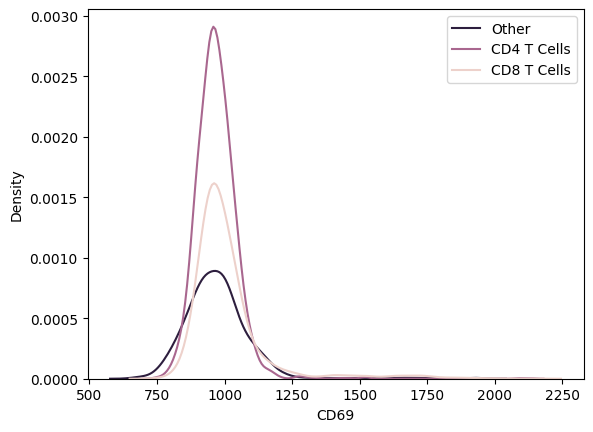

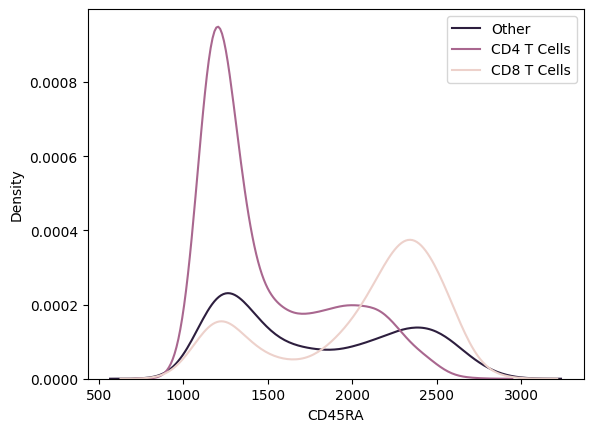

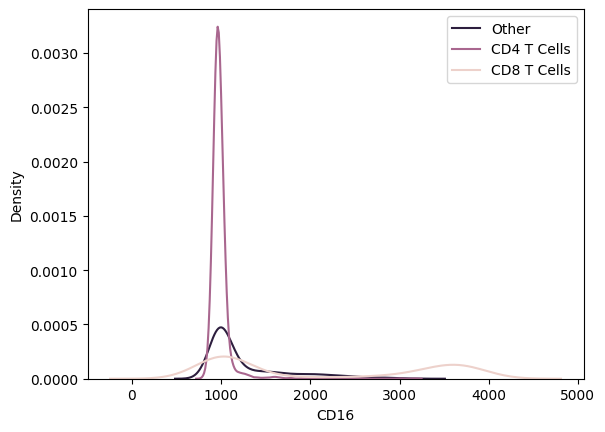

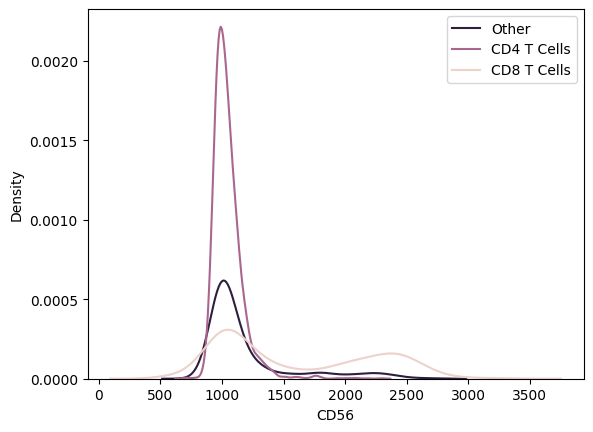

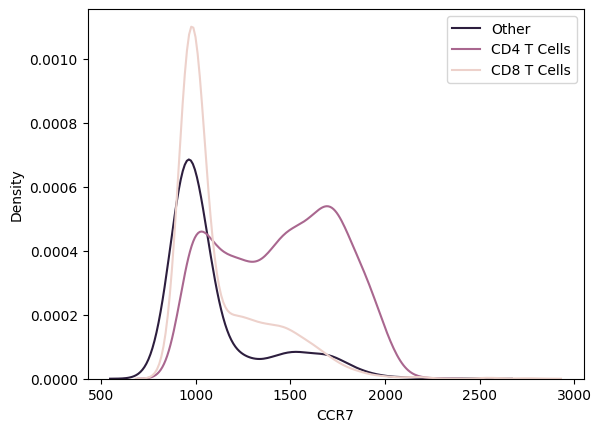

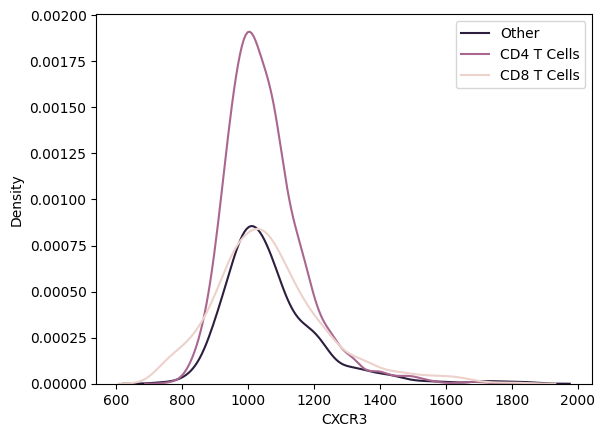

In [129]:
for c in range(13):
    sns.kdeplot(data = Z6GL_testT, x = Z6GL_testT.columns[c], hue = 'Cell Class')
    plt.legend(labels = Z6GLclasses)
    plt.xlabel(Z6GLflowParams[c])
    plt.show()

## MAP Classifier

In [1481]:
!pip install skewt_scipy
!pip install statsmodels

In [1515]:
import scipy.stats as st
from skewt_scipy.skewt import skewt
from scipy import integrate
from sklearn.metrics import accuracy_score

In [1600]:
class MAP:
    classes = ...
    prior = ...
    distributions = []
    
    def __init__(self, distribution):
        self.distribution = distribution

    def fit(self, X_train, Y_train):
        # X_train and Y_train numpy arrays
        # Y_train is labels from 0, 1, 2....x
        self.classes, counts = np.unique(Y_train, return_counts=True)
        self.classes = self.classes.astype(int)
        self.prior = counts / len(Y_train)
        
        feature_train = []
        for c in self.classes:
            i = np.where(Y_train == c)[0]
            feature_train.append(X_train[i])

        for feature in feature_train:
            temp_dist = []
            for i in range(len(feature[0])):
                dist = self.find_dist(feature[:,i])
                temp_dist.append(dist)
            self.distributions.append(temp_dist)

    def predict(self, X_test):
        predictions = []
        delta = 1e-6
        for row in X_test:
            posts = np.ones(len(self.classes))
            for c in self.classes:
                post = 1. * self.prior[c]
                for i in range(len(self.distributions[0])):
                    likelihood = integrate.quad(self.distributions[c][i].pdf, row[i], row[i]+delta)[0]
                    post = post * likelihood
                posts[c] = post
            predictions.append(np.argmax(posts))
        return np.array(predictions).astype(int)

    def score(self, X, Y):
        return accuracy_score(Y, self.predict(X))
        
    def find_dist(self, param):
        if self.distribution == 'norm':
            params = st.norm.fit(param)
            return st.norm(params[0],params[1])
        elif self.distribution == 't':
            params = st.t.fit(param)
            return st.t(params[0], params[1], params[2])
        elif self.distribution == 'skewNorm':
            params = st.skewnorm.fit(param)
            return st.skewnorm(params[0], params[1], params[2])
        elif self.distribution == 'skew-tA':
            params = skewt.fit(data = param)
            return skewt(params[0], params[1], params[2], params[3])
        elif self.distribution == 'skew-tJF':
            params = st.jf_skew_t.fit(data = param)
            return st.jf_skew_t(params[0], params[1], params[2], params[3])
        else:
            raise ValueError("{} is not a supported distribution.".format(self.distribution))

### Testing on Dataset ran on Github

In [103]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
Y = wine.data.targets 

In [105]:
label_count = [0, 0, 0]
for y in Y.values:
    label_count[int(y)-1] += 1
print(label_count)

[59, 71, 48]


C:\Users\waver\AppData\Local\Temp\ipykernel_17492\3273717667.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_count[int(y)-1] += 1


In [107]:
X_and_Y = np.hstack((X, Y))     # Stack them together for shuffling.
np.random.seed(2)
np.random.shuffle(X_and_Y[0:label_count[0]])
np.random.shuffle(X_and_Y[label_count[0]:label_count[0]+label_count[1]])
np.random.shuffle(X_and_Y[label_count[0]+label_count[1]:X_and_Y.shape[0]])

In [109]:
X_shuffled = X_and_Y[:,:13]
Y_shuffled = X_and_Y[:,13]
#range_Train = np.r_([18:label_count[0], label_count[0]+18:label_count[1], label_count[1]+18:label_count[2]])
X_train = np.vstack((X_shuffled[18:label_count[0]], X_shuffled[label_count[0]+18:label_count[0]+label_count[1]], X_shuffled[label_count[0] + label_count[1]+18:len(X_shuffled)]))
Y_train = np.hstack((Y_shuffled[18:label_count[0]], Y_shuffled[label_count[0]+18:label_count[0]+label_count[1]], Y_shuffled[label_count[0] + label_count[1]+18:len(Y_shuffled)])) - 1
X_test = np.vstack((X_shuffled[:18], X_shuffled[label_count[0]:label_count[0]+18], X_shuffled[label_count[0] + label_count[1]:label_count[0] + label_count[1]+18]))
Y_test = np.hstack((Y_shuffled[:18], Y_shuffled[label_count[0]:label_count[0]+18], Y_shuffled[label_count[0] + label_count[1]:label_count[0] + label_count[1]+18])).astype(int) - 1
display(Y_test.shape)
u, counts = np.unique(Y_train, return_counts = True)
counts/len(Y_train)

(54,)

array([0.33064516, 0.42741935, 0.24193548])

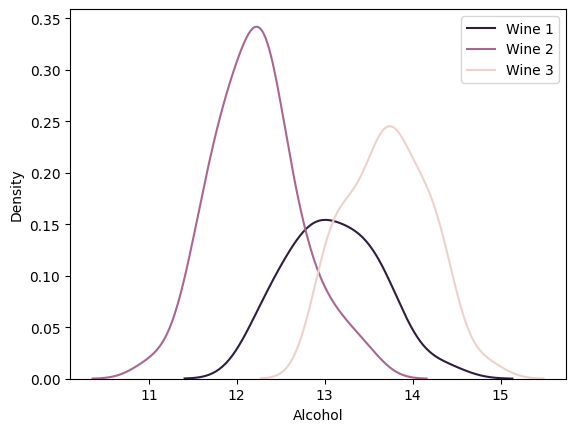

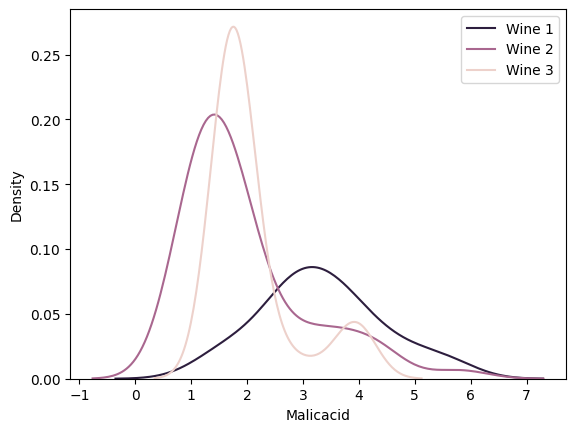

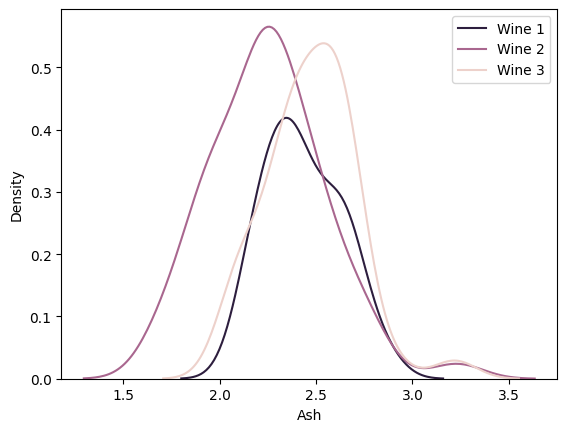

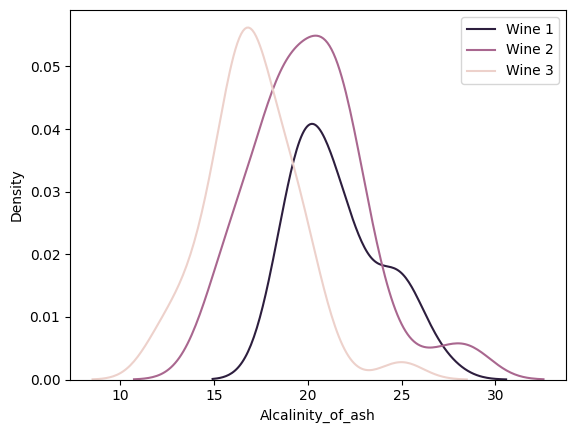

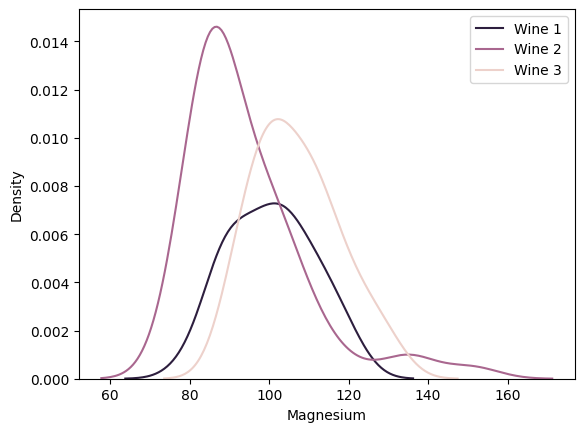

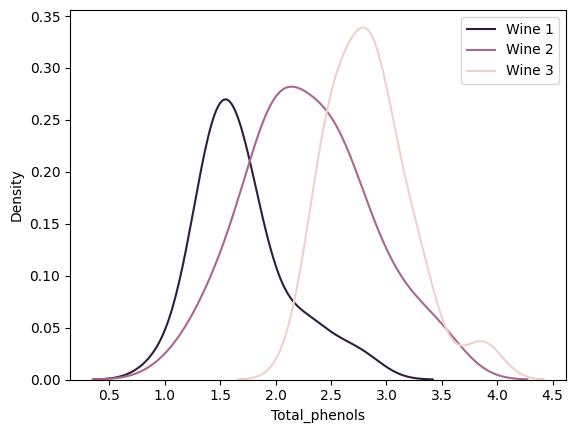

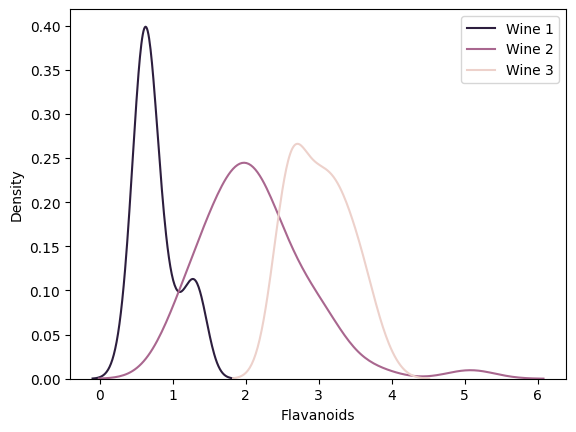

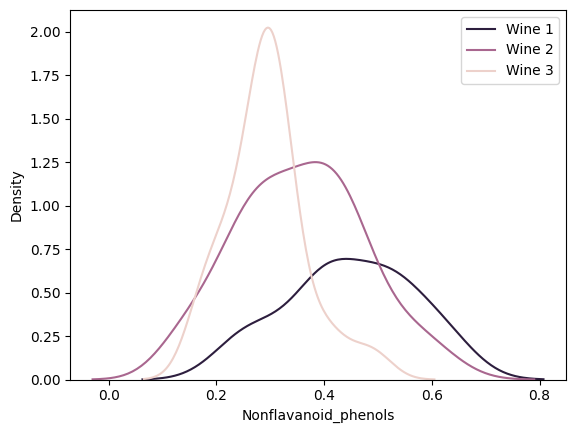

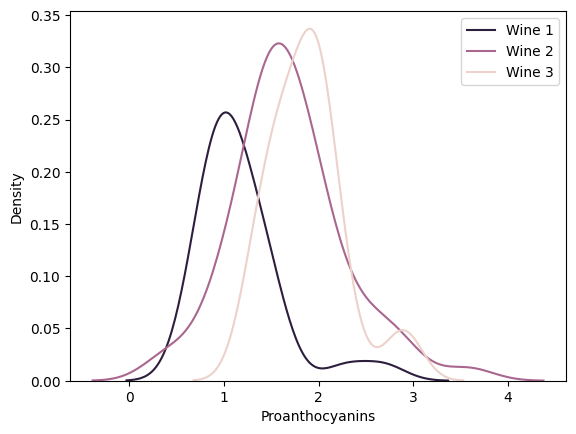

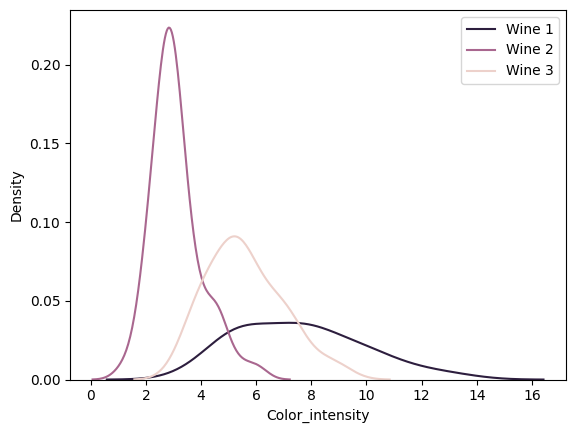

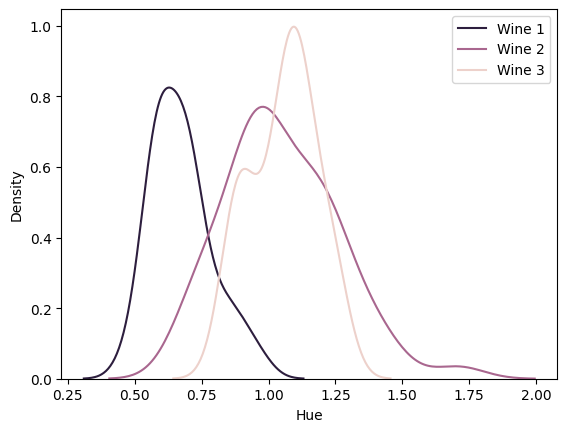

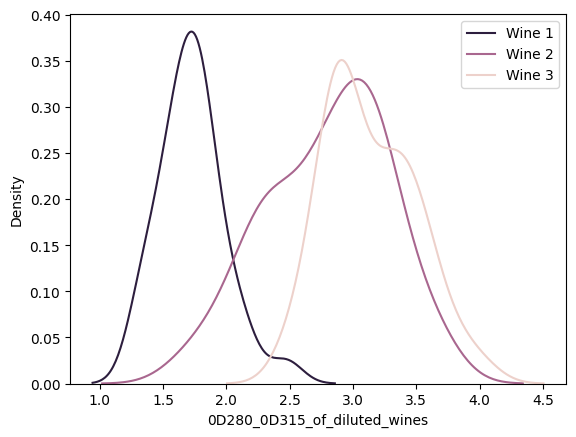

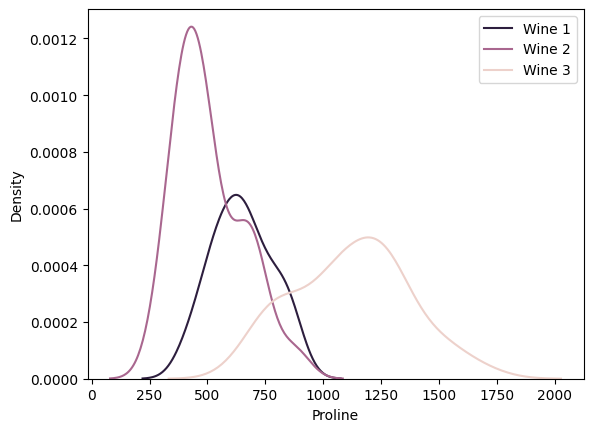

In [149]:
train = pd.DataFrame(np.hstack((Y_train.reshape(-1,1), X_train)))
for c in range(1,14):
    sns.kdeplot(data = train, x = train.columns[c], hue = 0)
    plt.legend(labels = ['Wine 1', 'Wine 2','Wine 3'])
    plt.xlabel(X.columns[c-1])
    plt.show()

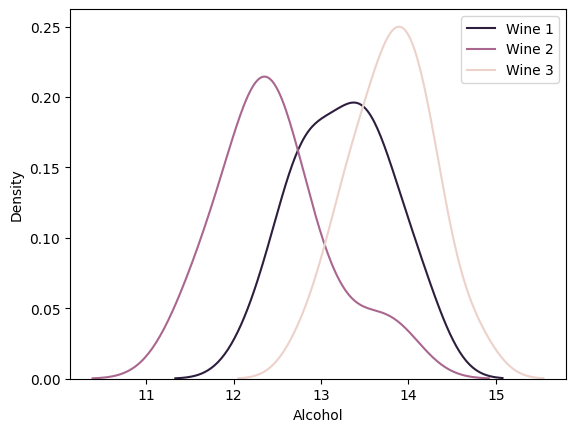

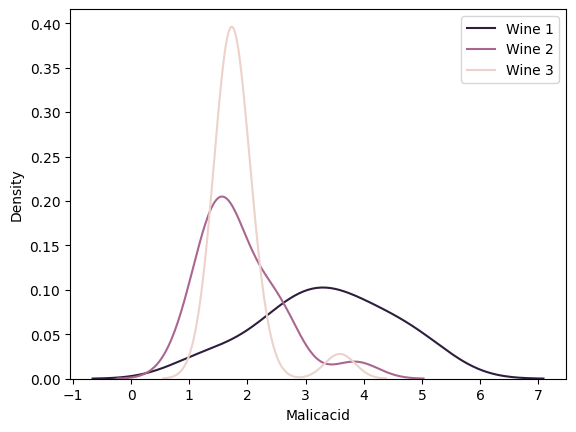

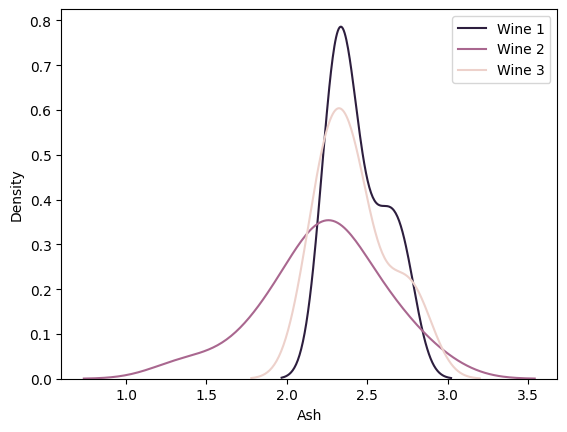

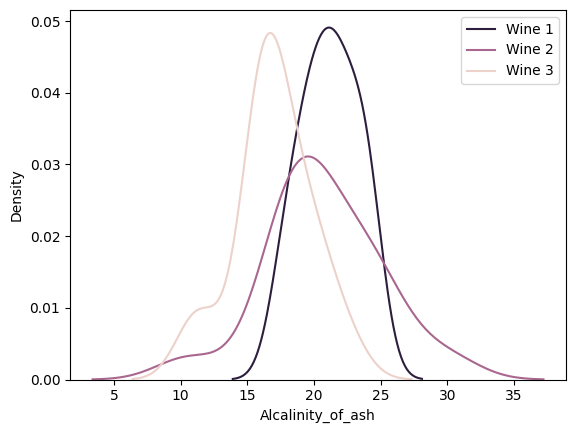

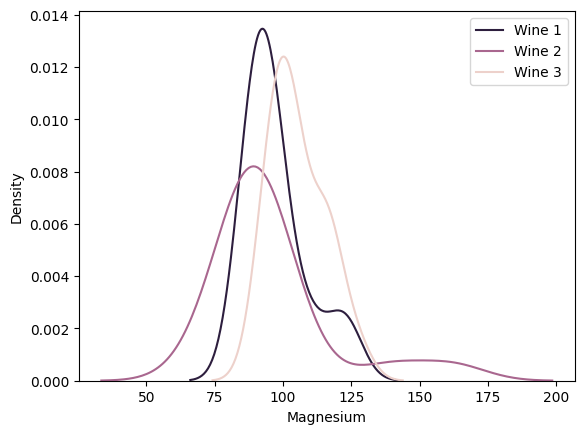

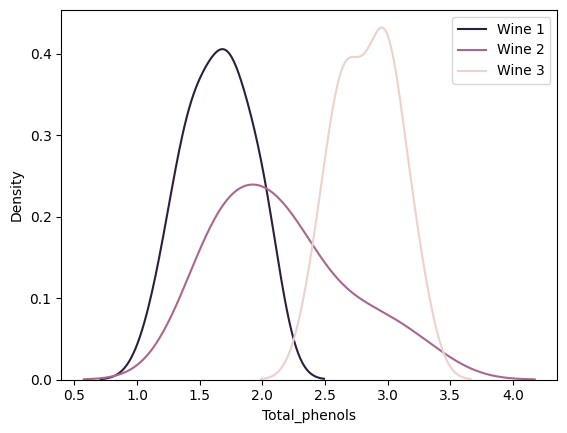

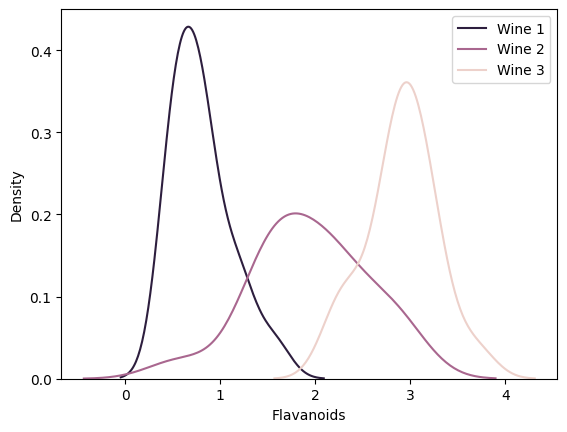

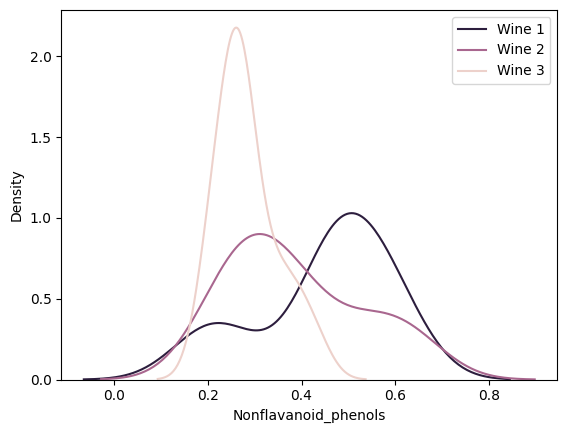

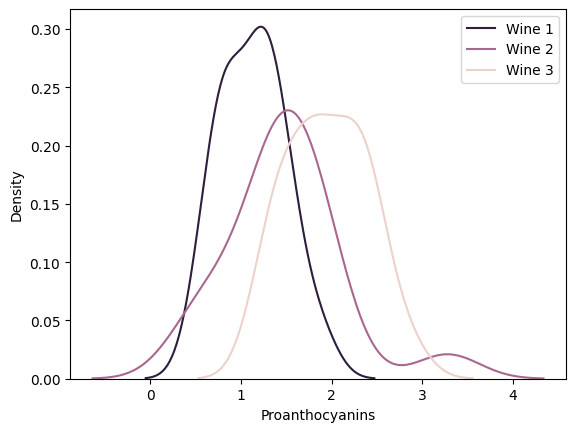

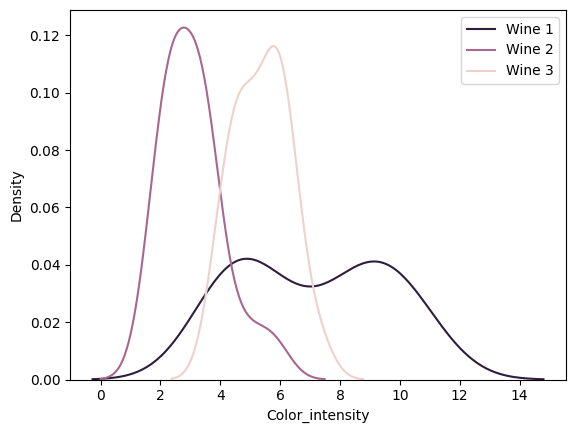

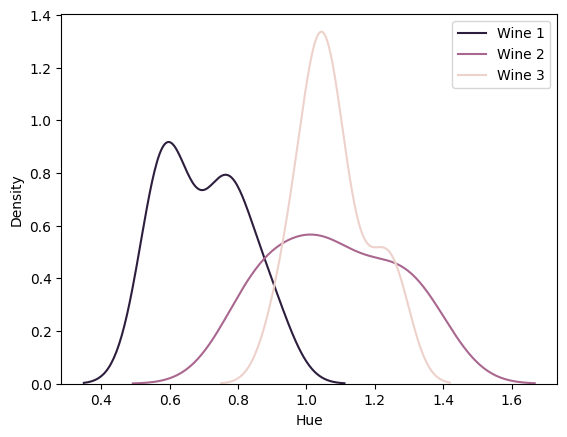

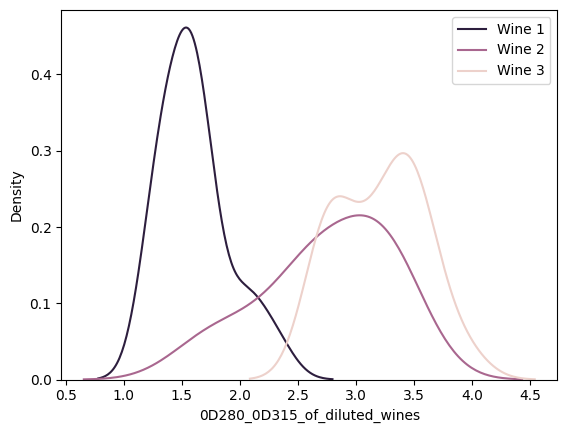

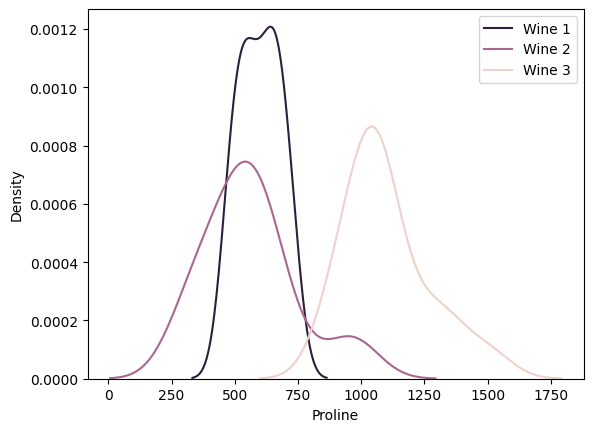

In [151]:
test = pd.DataFrame(np.hstack((Y_test.reshape(-1,1), X_test)))
for c in range(1,14):
    sns.kdeplot(data = test, x = test.columns[c], hue = 0)
    plt.legend(labels = ['Wine 1', 'Wine 2','Wine 3'])
    plt.xlabel(X.columns[c-1])
    plt.show()

In [1961]:
map = MAP(distribution = 'norm')
map.fit(X_train, Y_train)
display(map.score(X_train, Y_train))
map.score(X_test, Y_test)

0.9919354838709677

0.9814814814814815

In [1957]:
def cross_val(clf, X, Y, cv=10):
    # Split the data into k folds
    fold_size = len(X) // cv
    indices = np.arange(len(X))
    np.random.shuffle(indices)

    scores = []

    for i in range(cv):
        validation_indices = indices[i * fold_size:(i + 1) * fold_size]
        train_indices = np.delete(indices, validation_indices)
        X_train = X[train_indices]
        Y_train = Y[train_indices]
        X_val = X[validation_indices]
        Y_val = Y[validation_indices]

        clf.fit(X_train, Y_train)

        score = clf.score(X_val, Y_val)  # Use appropriate evaluation metric
        scores.append(score)

    return scores

np.mean(cross_val(MAP(distribution = 'norm'), X_train, Y_train, cv=3))

0.991869918699187

In [2099]:
def output_MAP(X_train, Y_train, X_test, Y_test, flowParams='auto', classes = None):
    dists = ['norm','t','skew-tA']
    for d in dists:
        print(d)
        map = MAP(distribution = d)
        map.fit(X_train, Y_train)
        Y_pred = map.predict(X_test)

        #Errors
        print("Training Error: {}".format(map.score(X_train, Y_train)))
        print("Testing Error: {}".format(accuracy_score(Y_test, Y_pred)))
        print("Cross-Validation Error: {}".format(np.mean(cross_val(map, X_train, Y_train))))

        #Confusion Matrix -- Test
        cmatrix.from_predictions(Y_test, Y_pred, display_labels = classes, cmap = 'RdPu')
        plt.show()

        #Heatmap 
        trained = pd.DataFrame(np.hstack((Y_train.reshape(-1,1), X_train))).groupby(0).mean()
        tested = pd.DataFrame(np.hstack((Y_test.reshape(-1,1), X_test))).groupby(0).mean()
        predicted = pd.DataFrame(np.hstack((Y_pred.reshape(-1,1), X_test))).groupby(0).mean()
        for i in predicted.index.astype(int):
            print(i)
            means = np.vstack((trained.iloc[i].values, predicted.iloc[i].values, tested.iloc[i].values)).T
            sns.heatmap(means, xticklabels = ['Train', 'Predicted','Test'], yticklabels = flowParams, linewidth = 0.1)
            plt.show()

<Figure size 300x600 with 0 Axes>

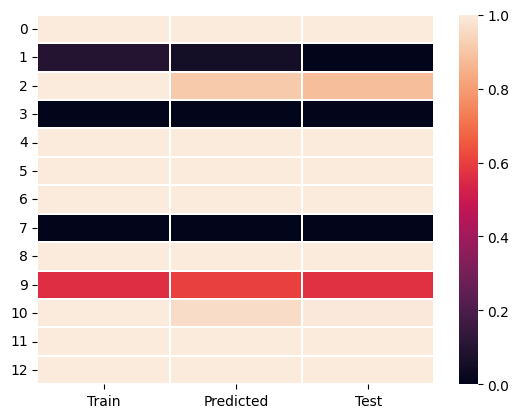

In [1955]:
trained = pd.DataFrame(np.hstack((Y_train.reshape(-1,1), X_train))).groupby(0).mean().apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)
tested = pd.DataFrame(np.hstack((Y_test.reshape(-1,1), X_test))).groupby(0).mean().apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)
predicted = pd.DataFrame(np.hstack((Y_pred.reshape(-1,1), X_test))).groupby(0).mean().apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)
means = np.vstack((trained.iloc[0].values, predicted.iloc[0].values, tested.iloc[0].values)).T
plt.figure(figsize = (3,6))
fig, ax = plt.subplots()
sns.heatmap(means, xticklabels = ['Train', 'Predicted','Test'], linewidth = 0.1)
plt.yticks(rotation = 0)
plt.show()

In [1701]:
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay as cmatrix
import matplotlib.pyplot as plt

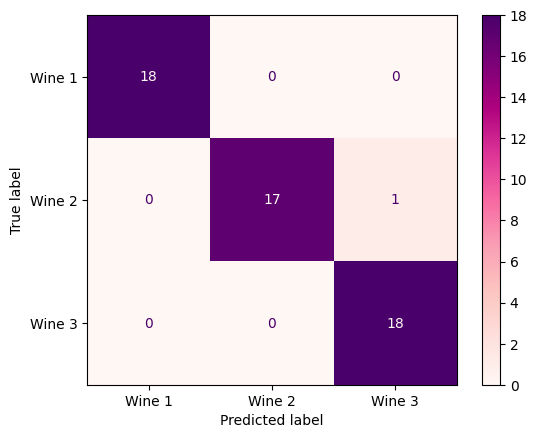

In [1974]:
cmatrix.from_predictions(Y_test, Y_pred, display_labels = ['Wine 1','Wine 2','Wine 3'], cmap = 'RdPu')

## Z6GL - Transformed - Testing

In [2101]:
X_train = Z6GL_trainposteriorT.iloc[:,:13].values
Y_train = Z6GL_trainposteriorT.iloc[:,13].values
X_test = Z6GL_testT.iloc[:,:13].values
Y_test = Z6GL_testT.iloc[:,13].values

norm
Training Error: 0.30098009800980097
Testing Error: 0.3014985014985015
Cross-Validation Error: 0.3010505252626313


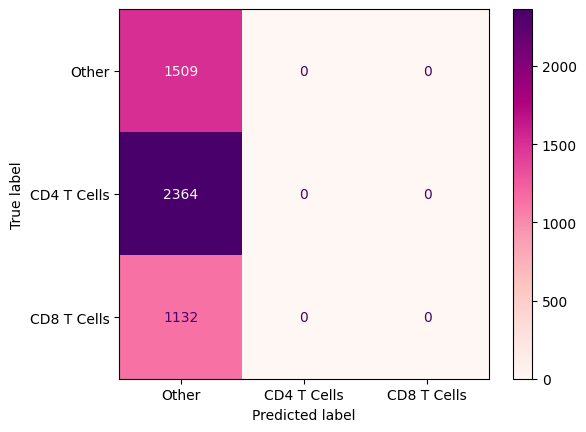

0


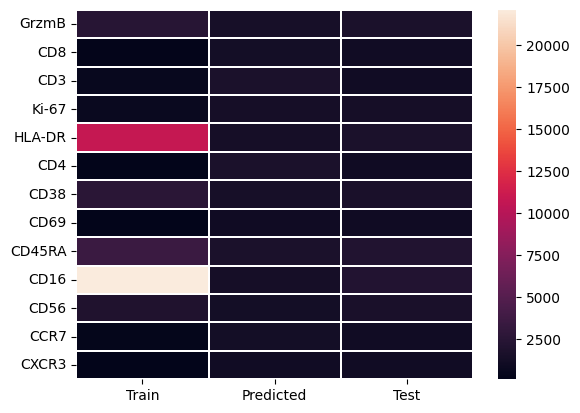

t
Training Error: 0.30098009800980097
Testing Error: 0.3014985014985015
Cross-Validation Error: 0.30100050025012504


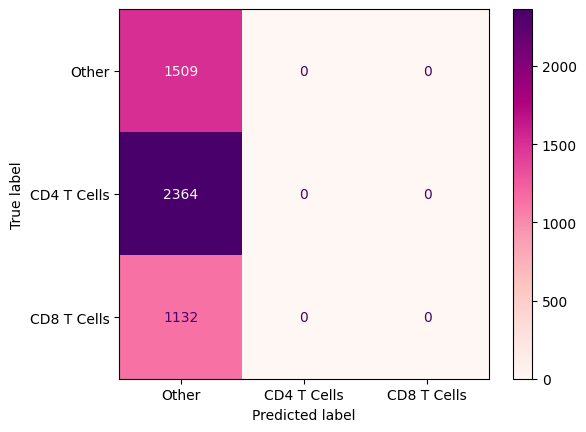

0


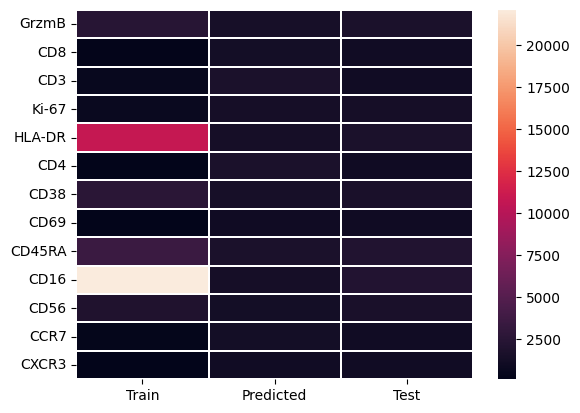

skew-tA


C:\Users\waver\anaconda3\Lib\site-packages\skewt_scipy\skewt.py:210: RuntimeWarning: invalid value encountered in sqrt
  + t.logcdf(a_ * x_ * np.sqrt((df_ + 1) / (x_**2 + df_)), df_ + 1),


Training Error: 0.30098009800980097
Testing Error: 0.3014985014985015


C:\Users\waver\anaconda3\Lib\site-packages\skewt_scipy\skewt.py:210: RuntimeWarning: invalid value encountered in sqrt
  + t.logcdf(a_ * x_ * np.sqrt((df_ + 1) / (x_**2 + df_)), df_ + 1),
C:\Users\waver\anaconda3\Lib\site-packages\skewt_scipy\skewt.py:210: RuntimeWarning: invalid value encountered in sqrt
  + t.logcdf(a_ * x_ * np.sqrt((df_ + 1) / (x_**2 + df_)), df_ + 1),
C:\Users\waver\anaconda3\Lib\site-packages\skewt_scipy\skewt.py:210: RuntimeWarning: invalid value encountered in sqrt
  + t.logcdf(a_ * x_ * np.sqrt((df_ + 1) / (x_**2 + df_)), df_ + 1),
C:\Users\waver\anaconda3\Lib\site-packages\skewt_scipy\skewt.py:210: RuntimeWarning: invalid value encountered in sqrt
  + t.logcdf(a_ * x_ * np.sqrt((df_ + 1) / (x_**2 + df_)), df_ + 1),
C:\Users\waver\anaconda3\Lib\site-packages\skewt_scipy\skewt.py:210: RuntimeWarning: invalid value encountered in sqrt
  + t.logcdf(a_ * x_ * np.sqrt((df_ + 1) / (x_**2 + df_)), df_ + 1),
C:\Users\waver\anaconda3\Lib\site-packages\skewt_scipy\skewt

Cross-Validation Error: 0.3009504752376188


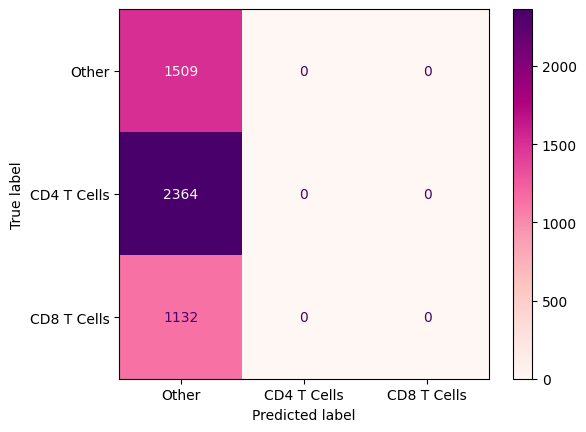

0


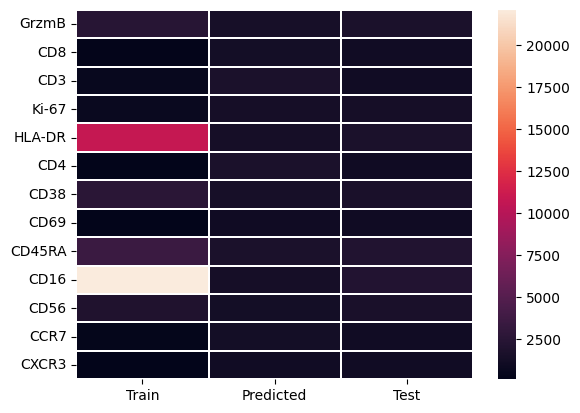

In [2103]:
output_MAP(X_train, Y_train, X_test, Y_test, flowParams = Z6GLflowParams, classes = Z6GLclasses)

In [2104]:
X_train = Z6GL_trainpriorT.iloc[:,:13].values
Y_train = Z6GL_trainpriorT.iloc[:,13].values

norm
Training Error: 0.33218373569250764
Testing Error: 0.3014985014985015
Cross-Validation Error: 0.3321


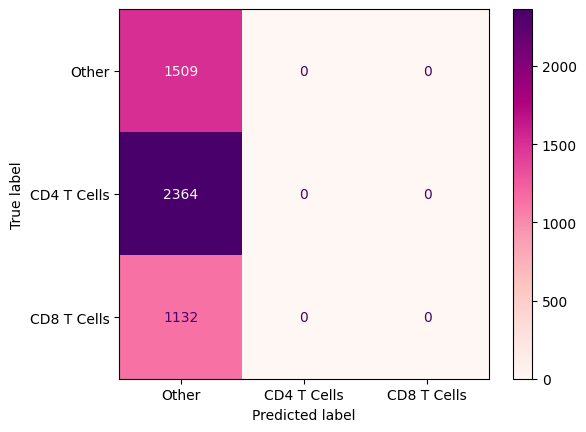

0


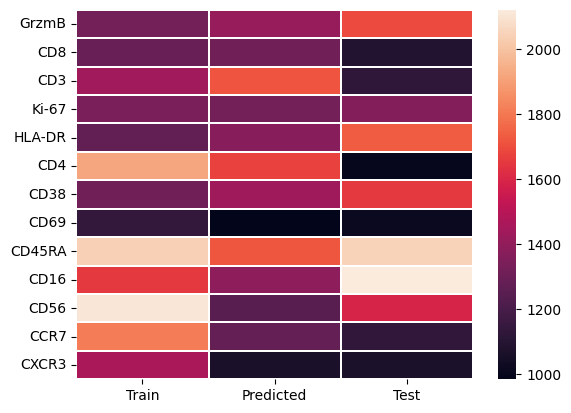

t
Training Error: 0.33218373569250764
Testing Error: 0.3014985014985015
Cross-Validation Error: 0.33225


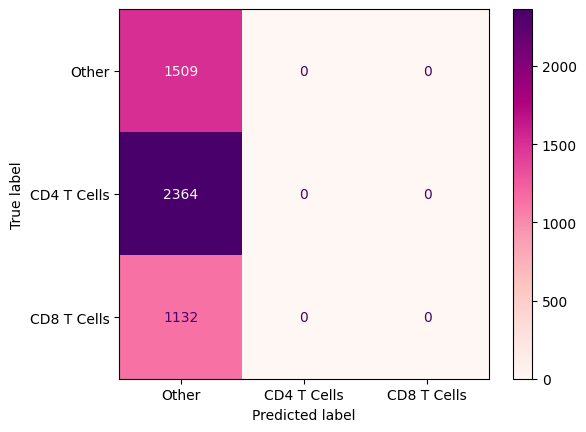

0


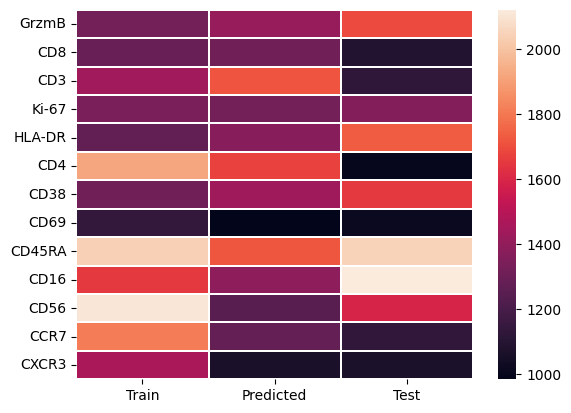

skew-tA


C:\Users\waver\anaconda3\Lib\site-packages\skewt_scipy\skewt.py:210: RuntimeWarning: invalid value encountered in sqrt
  + t.logcdf(a_ * x_ * np.sqrt((df_ + 1) / (x_**2 + df_)), df_ + 1),


Training Error: 0.33218373569250764
Testing Error: 0.3014985014985015


C:\Users\waver\anaconda3\Lib\site-packages\skewt_scipy\skewt.py:210: RuntimeWarning: invalid value encountered in sqrt
  + t.logcdf(a_ * x_ * np.sqrt((df_ + 1) / (x_**2 + df_)), df_ + 1),
C:\Users\waver\anaconda3\Lib\site-packages\skewt_scipy\skewt.py:210: RuntimeWarning: invalid value encountered in sqrt
  + t.logcdf(a_ * x_ * np.sqrt((df_ + 1) / (x_**2 + df_)), df_ + 1),
C:\Users\waver\anaconda3\Lib\site-packages\skewt_scipy\skewt.py:210: RuntimeWarning: invalid value encountered in sqrt
  + t.logcdf(a_ * x_ * np.sqrt((df_ + 1) / (x_**2 + df_)), df_ + 1),
C:\Users\waver\anaconda3\Lib\site-packages\skewt_scipy\skewt.py:210: RuntimeWarning: invalid value encountered in sqrt
  + t.logcdf(a_ * x_ * np.sqrt((df_ + 1) / (x_**2 + df_)), df_ + 1),
C:\Users\waver\anaconda3\Lib\site-packages\skewt_scipy\skewt.py:210: RuntimeWarning: invalid value encountered in sqrt
  + t.logcdf(a_ * x_ * np.sqrt((df_ + 1) / (x_**2 + df_)), df_ + 1),
C:\Users\waver\anaconda3\Lib\site-packages\skewt_scipy\skewt

Cross-Validation Error: 0.3322


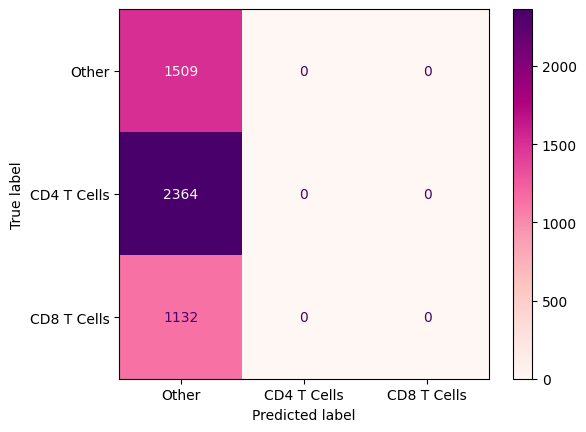

0


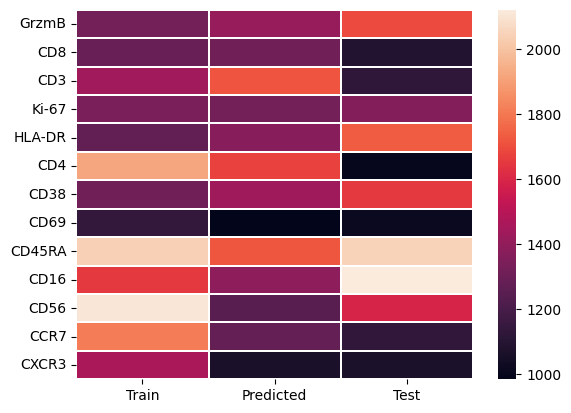

In [2105]:
output_MAP(X_train, Y_train, X_test, Y_test, flowParams = Z6GLflowParams, classes = Z6GLclasses)

## Z3JB Testing

In [2106]:
X_train = Z3JBtrain.iloc[:,:29].values
Y_train = Z3JBtrain.iloc[:,29].values
X_test = Z3JBtest.iloc[:,:29].values
Y_test = Z3JBtest.iloc[:,29].values

norm
Training Error: 0.3409
Testing Error: 0.2184
Cross-Validation Error: 0.34090000000000004


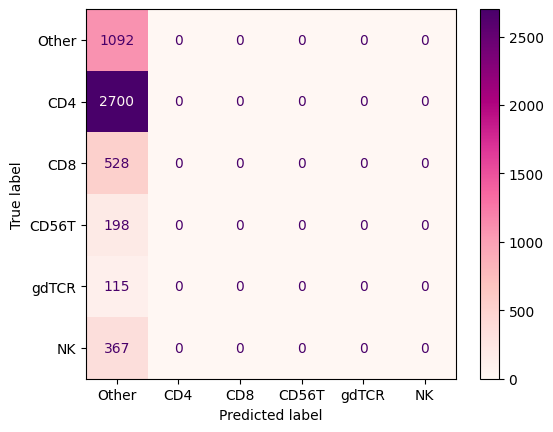

0


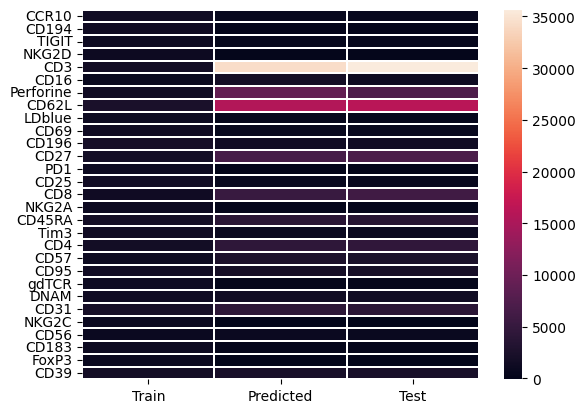

t
Training Error: 0.3409
Testing Error: 0.2184
Cross-Validation Error: 0.3409


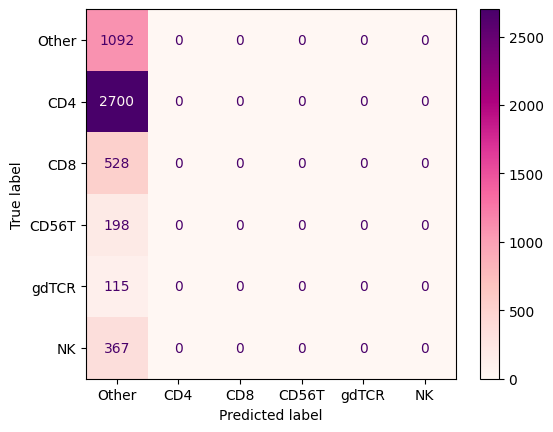

0


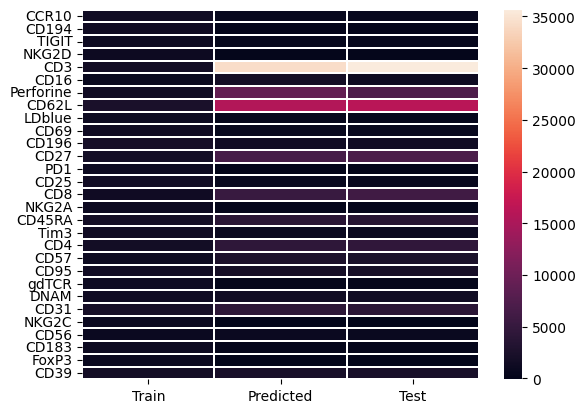

skew-tA


C:\Users\waver\anaconda3\Lib\site-packages\skewt_scipy\skewt.py:210: RuntimeWarning: invalid value encountered in sqrt
  + t.logcdf(a_ * x_ * np.sqrt((df_ + 1) / (x_**2 + df_)), df_ + 1),


Training Error: 0.3409
Testing Error: 0.2184


C:\Users\waver\anaconda3\Lib\site-packages\skewt_scipy\skewt.py:210: RuntimeWarning: invalid value encountered in sqrt
  + t.logcdf(a_ * x_ * np.sqrt((df_ + 1) / (x_**2 + df_)), df_ + 1),
C:\Users\waver\anaconda3\Lib\site-packages\skewt_scipy\skewt.py:210: RuntimeWarning: invalid value encountered in sqrt
  + t.logcdf(a_ * x_ * np.sqrt((df_ + 1) / (x_**2 + df_)), df_ + 1),
C:\Users\waver\anaconda3\Lib\site-packages\skewt_scipy\skewt.py:210: RuntimeWarning: invalid value encountered in sqrt
  + t.logcdf(a_ * x_ * np.sqrt((df_ + 1) / (x_**2 + df_)), df_ + 1),
C:\Users\waver\anaconda3\Lib\site-packages\skewt_scipy\skewt.py:210: RuntimeWarning: invalid value encountered in sqrt
  + t.logcdf(a_ * x_ * np.sqrt((df_ + 1) / (x_**2 + df_)), df_ + 1),
C:\Users\waver\anaconda3\Lib\site-packages\skewt_scipy\skewt.py:210: RuntimeWarning: invalid value encountered in sqrt
  + t.logcdf(a_ * x_ * np.sqrt((df_ + 1) / (x_**2 + df_)), df_ + 1),
C:\Users\waver\anaconda3\Lib\site-packages\skewt_scipy\skewt

Cross-Validation Error: 0.34090000000000004


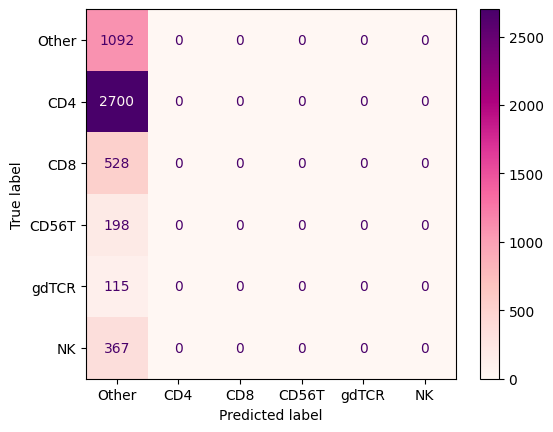

0


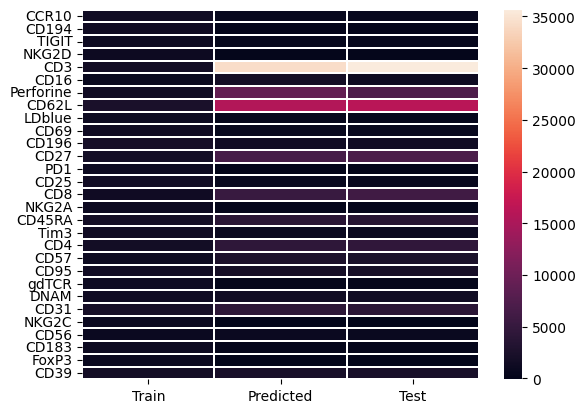

In [2107]:
output_MAP(X_train, Y_train, X_test, Y_test, flowParams = Z3JBflowParams, classes = ['Other','CD4','CD8','CD56T','gdTCR','NK'])

## Z6GL Extra Testing If Time

In [2108]:
X_train = Z6GL_trainhalfT.iloc[:,:13].values
Y_train = Z6GL_trainhalfT.iloc[:,13].values
X_test = Z6GL_testT.iloc[:,:13].values
Y_test = Z6GL_testT.iloc[:,13].values

In [2109]:
output_MAP(X_train, Y_train, X_test, Y_test, flowParams = Z6GLflowParams, classes = Z6GLclasses)

norm


KeyboardInterrupt: 

In [ ]:
X_train = Z6GL_trainposterior.iloc[:,:13].values
Y_train = Z6GL_trainposterior.iloc[:,13].values

In [ ]:
output_MAP(X_train, Y_train, X_test, Y_test, flowParams = Z6GLflowParams, classes = Z6GLclasses)

In [ ]:
X_train = Z6GL_trainprior.iloc[:,:13].values
Y_train = Z6GL_trainprior.iloc[:,13].values

In [ ]:
output_MAP(X_train, Y_train, X_test, Y_test, flowParams = Z6GLflowParams, classes = Z6GLclasses)

In [ ]:
X_train = Z6GL_trainhalf.iloc[:,:13].values
Y_train = Z6GL_trainhalf.iloc[:,13].values

In [ ]:
output_MAP(X_train, Y_train, X_test, Y_test, flowParams = Z6GLflowParams, classes = Z6GLclasses)